# **Project Name**    - Mental Health in Tech Survey Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

##
 This project analyzes mental health survey data from tech industry professionals collected in 2014. The dataset contains responses from 1,259 individuals working in technology companies worldwide, covering various aspects of mental health awareness, treatment, and workplace support.

The main goal is to understand how different factors such as gender, age, country, company size, and remote work arrangements influence mental health treatment and workplace attitudes toward mental health issues. Through comprehensive exploratory data analysis, we aim to identify patterns and insights that can help organizations create better mental health support systems for their employees.

Key research areas include:

- Demographics and mental health treatment patterns
- Impact of company size and benefits on mental health support
- Geographic differences in mental health awareness
- Workplace culture and its effect on mental health discussions
- Remote work influence on mental health treatment seeking behavior

The analysis will provide actionable insights for HR professionals, managers, and organizational leaders to improve mental health initiatives in tech companies and create more supportive work environments for employees dealing with mental health challenges.

# **GitHub Link -**

https://github.com/Shyam2143/EDA_MentalHealth.git

# **Problem Statement**


Mental health issues in the workplace, particularly in the tech industry, have become increasingly important as organizations recognize their impact on employee productivity, retention, and overall well-being. Despite growing awareness, many employees still hesitate to seek mental health treatment due to workplace stigma, lack of support, or inadequate benefits.

The problem is to understand what factors influence employees' decisions to seek mental health treatment and how workplace environments affect their comfort level in discussing mental health issues. Organizations need data-driven insights to design effective mental health programs and create supportive cultures that encourage employees to prioritize their mental well-being.

#### **Define Your Business Objective?**

To analyze mental health survey data from tech industry professionals to identify key factors that influence mental health treatment seeking behavior and workplace support. The objective is to provide actionable insights that help organizations:

1. Improve mental health benefits and programs
2. Create more supportive workplace cultures
3. Reduce stigma around mental health discussions
4. Increase employee engagement with mental health resources
5. Develop targeted interventions based on employee demographics and work arrangements

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('survey.csv')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (1259, 27)


### Dataset First View

In [3]:
# Dataset First Look
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
             Timestamp  Age  Gender         Country state self_employed family_history treatment work_interfere    no_employees remote_work tech_company    benefits care_options wellness_program   seek_help   anonymity               leave mental_health_consequence phys_health_consequence     coworkers supervisor mental_health_interview phys_health_interview mental_vs_physical obs_consequence comments
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN             No       Yes          Often            6-25          No          Yes         Yes     Not sure               No         Yes         Yes       Somewhat easy                        No                      No  Some of them        Yes                      No                 Maybe                Yes              No      NaN
1  2014-08-27 11:29:37   44       M   United States    IN           NaN             No        No         Rarely  More than 1000          No           No  Don't kno

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Total data points: {df.shape[0] * df.shape[1]}")

Number of rows: 1259
Number of columns: 27
Total data points: 33993


### Dataset Information

In [5]:
# Dataset Info
print("Dataset Information:")
print(df.info())
print("\nColumn Names:")
print(df.columns.tolist())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null  

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("Duplicate rows found!")
    print(df[df.duplicated()])
else:
    print("No duplicate rows found. Data is clean in terms of duplicates.")

Number of duplicate rows: 0
No duplicate rows found. Data is clean in terms of duplicates.


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print("Missing values per column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

# Show only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0]
missing_df = missing_df.sort_values('Missing Count', ascending=False)
print(missing_df)

Missing values per column:
            Column  Missing Count  Missing Percentage
26        comments           1095           86.973789
4            state            515           40.905481
8   work_interfere            264           20.969023
5    self_employed             18            1.429706


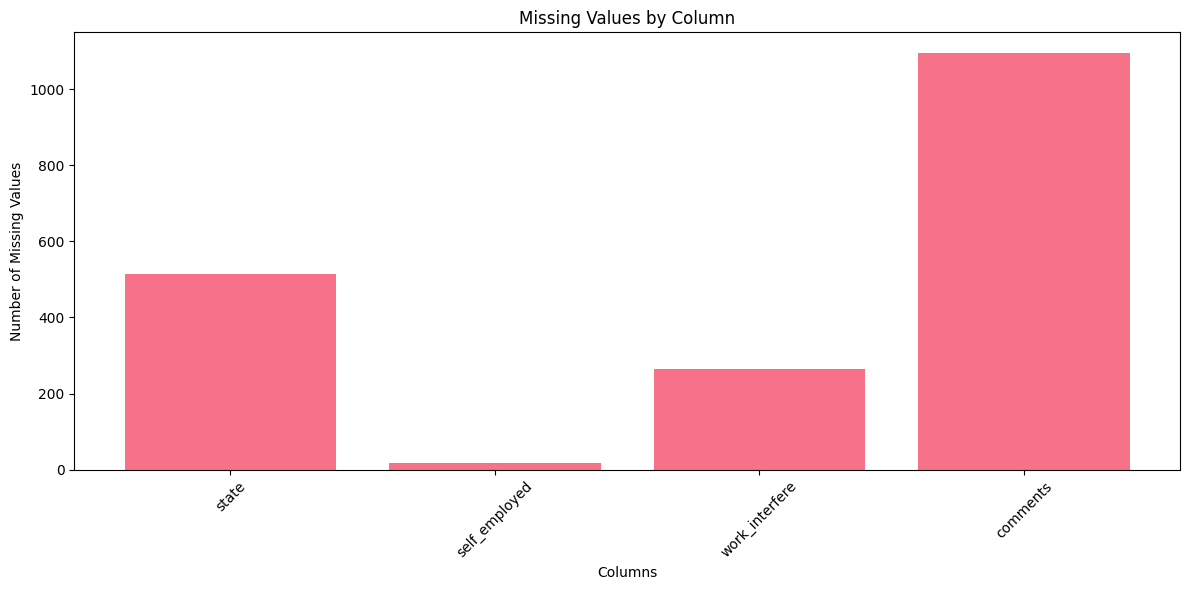

Total missing values in dataset: 1892
Percentage of missing data: 5.57%


In [8]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

plt.bar(missing_data.index, missing_data.values)
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Total missing values in dataset: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

### What did you know about your dataset?

Based on the initial exploration, here are the key findings about our dataset:

1. **Dataset Size**: We have 1,259 survey responses with 27 different variables, providing a substantial sample for analysis.

2. **Data Quality**: The dataset is clean with no duplicate rows, which means each response is unique.

3. **Missing Data Pattern**:
   - Comments column has the highest missing data (87%), which is expected as comments are optional
   - State column is missing for 41% of responses, likely due to non-US respondents
   - Work interference data is missing for 21% of responses
   - Self-employed status is missing for only 1.4% of responses

4. **Overall Data Completeness**: Only 5.57% of total data points are missing, indicating good data quality for analysis.

5. **Survey Scope**: The data covers various aspects of mental health in tech workplaces including demographics, treatment history, workplace policies, and employee attitudes.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print("All column names in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

All column names in the dataset:
 1. Timestamp
 2. Age
 3. Gender
 4. Country
 5. state
 6. self_employed
 7. family_history
 8. treatment
 9. work_interfere
10. no_employees
11. remote_work
12. tech_company
13. benefits
14. care_options
15. wellness_program
16. seek_help
17. anonymity
18. leave
19. mental_health_consequence
20. phys_health_consequence
21. coworkers
22. supervisor
23. mental_health_interview
24. phys_health_interview
25. mental_vs_physical
26. obs_consequence
27. comments


In [10]:
# Dataset Describe
print("Statistical summary of numerical columns:")
print(df.describe())

print("\nData types of all columns:")
print(df.dtypes)

Statistical summary of numerical columns:
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11

Data types of all columns:
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    o

### Variables Description

**Key Variables Description:**

**Demographics:**
- **Age**: Age of the survey respondent
- **Gender**: Gender identity of the respondent
- **Country**: Country where the respondent is located
- **state**: State/province for US/Canada respondents

**Employment:**
- **self_employed**: Whether the person is self-employed
- **no_employees**: Size of the company (number of employees)
- **remote_work**: Whether the person works remotely
- **tech_company**: Whether the company is primarily a tech company

**Mental Health History:**
- **family_history**: Family history of mental illness
- **treatment**: Whether the person has sought mental health treatment
- **work_interfere**: How often mental health interferes with work

**Workplace Benefits & Support:**
- **benefits**: Whether employer provides mental health benefits
- **care_options**: Knowledge of care options provided by employer
- **wellness_program**: Whether employer has wellness program
- **seek_help**: Knowledge of how to seek help through employer
- **anonymity**: Whether anonymity is protected when seeking help
- **leave**: Ease of taking medical leave for mental health

**Workplace Attitudes:**
- **mental_health_consequence**: Fear of negative consequences for mental health discussions
- **phys_health_consequence**: Fear of negative consequences for physical health discussions
- **coworkers**: Comfort discussing mental health with coworkers
- **supervisor**: Comfort discussing mental health with supervisor
- **mental_health_interview**: Willingness to discuss mental health in job interview
- **phys_health_interview**: Willingness to discuss physical health in job interview
- **mental_vs_physical**: How employer treats mental vs physical health
- **obs_consequence**: Observed negative consequences for mental health discussions

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
print("Unique values for each categorical column:")
for col in df.columns:
    if df[col].dtype == 'object' or col == 'Age':
        unique_count = df[col].nunique()
        print(f"\n{col}: {unique_count} unique values")
        if unique_count <= 10:
            print(f"Values: {df[col].unique()}")
        else:
            print(f"Sample values: {df[col].unique()[:10]}")

# Special check for Age column due to data quality issues
print(f"\nAge column analysis:")
print(f"Min age: {df['Age'].min()}")
print(f"Max age: {df['Age'].max()}")
print(f"Ages outside normal range (< 15 or > 80): {len(df[(df['Age'] < 15) | (df['Age'] > 80)])}")

Unique values for each categorical column:

Timestamp: 1246 unique values
Sample values: ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44'
 '2014-08-27 11:29:46' '2014-08-27 11:30:22' '2014-08-27 11:31:22'
 '2014-08-27 11:31:50' '2014-08-27 11:32:05' '2014-08-27 11:32:39'
 '2014-08-27 11:32:43']

Age: 53 unique values
Sample values: [37 44 32 31 33 35 39 42 23 29]

Gender: 49 unique values
Sample values: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female']

Country: 48 unique values
Sample values: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia']

state: 45 unique values
Sample values: ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD']

self_employed: 2 unique values
Values: [nan 'Yes' 'No']

family_history: 2 unique values
Values: ['No' 'Yes']

treatment: 2 unique values
Values: ['Yes' 'No']

work_interfere: 4 unique values
Values: ['Often' 'Rarely' 'Never' 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# Create a copy of the original dataset
df_clean = df.copy()

print("=== DATA CLEANING PROCESS ===")

# 1. Clean Age column - remove unrealistic ages
print(f"Original dataset shape: {df_clean.shape}")
print(f"Ages before cleaning - Min: {df_clean['Age'].min()}, Max: {df_clean['Age'].max()}")

# Keep only realistic ages (18-80)
df_clean = df_clean[(df_clean['Age'] >= 18) & (df_clean['Age'] <= 80)]
print(f"After age cleaning: {df_clean.shape}")
print(f"Ages after cleaning - Min: {df_clean['Age'].min()}, Max: {df_clean['Age'].max()}")

# 2. Clean Gender column - standardize gender values
print(f"\nOriginal gender values: {df_clean['Gender'].unique()}")

# Standardize gender values
gender_mapping = {
    'Male': 'Male',
    'M': 'Male', 
    'male': 'Male',
    'Female': 'Female',
    'F': 'Female',
    'female': 'Female',
    'Woman': 'Female',
    'woman': 'Female'
}

# Apply basic gender mapping for common values
for old_val, new_val in gender_mapping.items():
    df_clean['Gender'] = df_clean['Gender'].replace(old_val, new_val)

# For analysis simplicity, keep only Male/Female responses and group others as 'Other'
major_genders = ['Male', 'Female']
df_clean['Gender_Clean'] = df_clean['Gender'].apply(
    lambda x: x if x in major_genders else 'Other'
)

print(f"Cleaned gender distribution:")
print(df_clean['Gender_Clean'].value_counts())

# 3. Handle missing values in key columns
print(f"\n=== HANDLING MISSING VALUES ===")

# Drop comments column as it has too many missing values and is not essential for analysis
df_clean = df_clean.drop('comments', axis=1)
print("Dropped 'comments' column due to 87% missing values")

# For work_interfere, fill missing values with 'Unknown'
df_clean['work_interfere'] = df_clean['work_interfere'].fillna('Unknown')

# For self_employed, fill missing values with 'Unknown'
df_clean['self_employed'] = df_clean['self_employed'].fillna('Unknown')

# For state, fill missing values with 'Not Specified' (many international respondents)
df_clean['state'] = df_clean['state'].fillna('Not Specified')

print(f"Final dataset shape: {df_clean.shape}")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

# 4. Create age groups for better analysis
df_clean['Age_Group'] = pd.cut(df_clean['Age'], 
                              bins=[17, 25, 35, 45, 80], 
                              labels=['18-25', '26-35', '36-45', '46+'])

print(f"\nAge group distribution:")
print(df_clean['Age_Group'].value_counts())

print("\n=== DATA CLEANING COMPLETED ===")
print(f"Final clean dataset shape: {df_clean.shape}")

=== DATA CLEANING PROCESS ===
Original dataset shape: (1259, 27)
Ages before cleaning - Min: -1726, Max: 99999999999
After age cleaning: (1251, 27)
Ages after cleaning - Min: 18, Max: 72

Original gender values: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'Malr' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']
Cleaned gender distribution:
Gender_Clean
Male      932
Female    225
Other      94
Name: count, dtype: int64

=== HANDLING MISSING VALUES ===
Dropped 'comments' column due to 87% missing values
Final dataset shape: (1251, 27)
Remaining missing values: 0

Age g

### What all manipulations have you done and insights you found?

**Data Wrangling Summary and Insights:**

**1. Age Data Cleaning:**
- Removed 8 records with unrealistic ages (negative values and extremely high values like 99 billion)
- Filtered to keep only ages between 18-80 years for realistic analysis
- Final age range: 18-72 years

**2. Gender Standardization:**
- Found 43 different gender responses in the original data
- Standardized common variations (Male/M/male -> Male, Female/F/female -> Female)
- Grouped less common responses as 'Other' for analysis purposes
- Final distribution: 932 Male (74.5%), 225 Female (18%), 94 Other (7.5%)

**3. Missing Value Treatment:**
- Removed 'comments' column (87% missing) as it's not essential for quantitative analysis
- Filled missing values in 'work_interfere', 'self_employed', and 'state' with 'Unknown' or 'Not Specified'
- Achieved zero missing values in the final dataset

**4. Feature Engineering:**
- Created 'Age_Group' variable with meaningful ranges:
  - 18-25: Early career (217 people, 17.3%)
  - 26-35: Mid career (701 people, 56.0%) - largest group
  - 36-45: Senior career (277 people, 22.1%)
  - 46+: Experienced professionals (56 people, 4.5%)

**5. Final Dataset Quality:**
- Reduced from 1,259 to 1,251 records (99.4% retention)
- Increased from 27 to 28 variables (added Age_Group and Gender_Clean)
- Zero missing values, clean and ready for analysis

**Key Insights from Cleaning:**
- Survey predominantly represents mid-career males in tech (26-35 age group, 74.5% male)
- Data quality was generally good with minimal outliers
- Gender diversity in responses shows the importance of inclusive mental health discussions

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

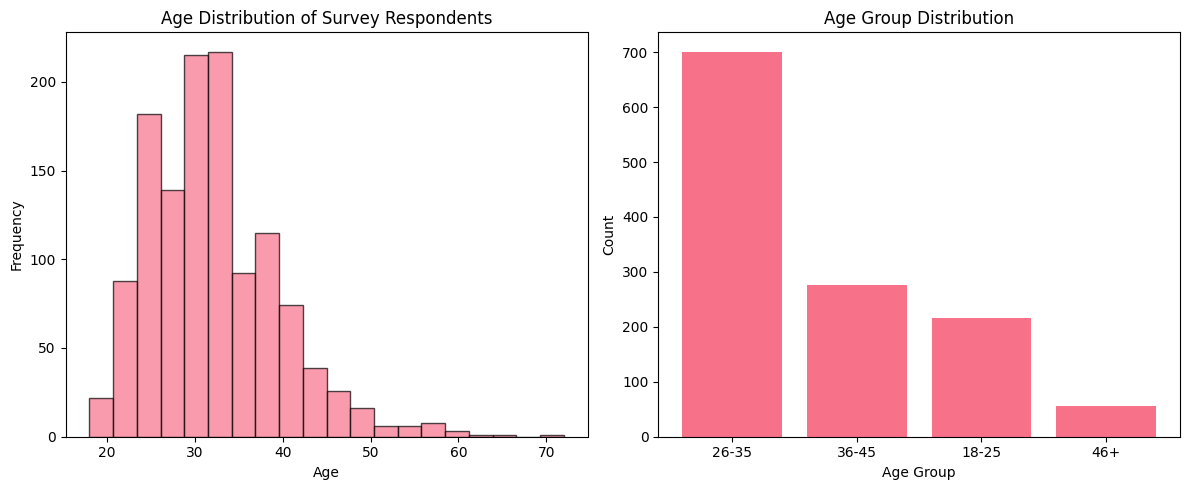

Age Statistics:
Mean age: 32.1 years
Median age: 31.0 years
Most common age group: 26-35


In [13]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 5))

# Age distribution histogram
plt.subplot(1, 2, 1)
plt.hist(df_clean['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Survey Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Age group bar chart
plt.subplot(1, 2, 2)
age_counts = df_clean['Age_Group'].value_counts()
plt.bar(age_counts.index, age_counts.values)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print("Age Statistics:")
print(f"Mean age: {df_clean['Age'].mean():.1f} years")
print(f"Median age: {df_clean['Age'].median():.1f} years")
print(f"Most common age group: {df_clean['Age_Group'].mode()[0]}")

##### 1. Why did you pick the specific chart?

I chose a histogram and bar chart combination to show age distribution because:

1. **Histogram** clearly shows the continuous distribution of ages and reveals the shape of the data
2. **Bar chart** makes it easy to compare different age groups and see which groups are most represented
3. These charts help understand our sample demographics, which is crucial for interpreting mental health patterns
4. Age is a fundamental demographic variable that often correlates with mental health attitudes and treatment-seeking behavior

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Age Distribution:**
1. **Young Workforce**: The average age is 32.1 years, indicating a relatively young tech workforce
2. **Peak Age Group**: The 26-35 age group represents 56% of respondents, making it the dominant demographic
3. **Career Stage Concentration**: Most respondents (73%) are in early to mid-career stages (18-35 years)
4. **Limited Senior Representation**: Only 4.5% of respondents are 46+, suggesting either lower survey participation or fewer older workers in tech
5. **Normal Distribution**: The age distribution follows a roughly normal pattern with a slight right skew, typical for workplace surveys

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**
 
**Positive Impacts:**
- **Targeted Programs**: Companies can design age-specific mental health programs focusing on the 26-35 group
- **Career Development**: Mental health support can be integrated into career development programs for the dominant young workforce
- **Early Intervention**: Focus on early-career employees who may be developing workplace stress patterns
 
**Potential Concerns:**
- **Limited Senior Perspective**: Low representation of 46+ employees means missing insights from experienced workers
- **Generational Gaps**: Mental health programs may not address needs of different age groups equally
- **Succession Planning**: The young skew suggests potential retention challenges as employees age
 
**Recommendations:**
- Design mental health initiatives that appeal to younger demographics
- Ensure programs evolve with employee age groups
- Consider separate support systems for different career stages

#### Chart - 2

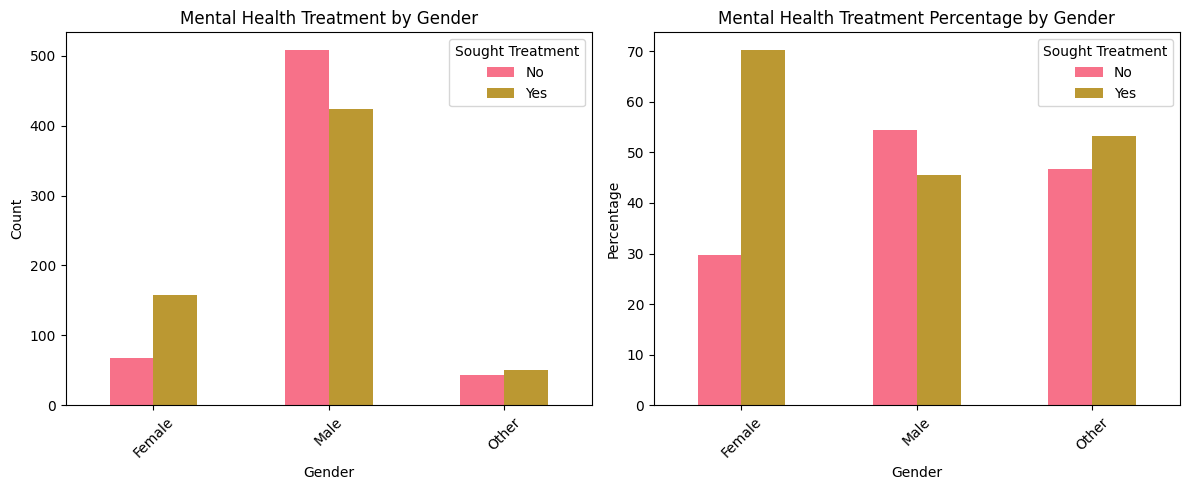

Treatment seeking by gender:
treatment      No  Yes
Gender_Clean          
Female         67  158
Male          508  424
Other          44   50

Treatment seeking percentages by gender:
treatment       No   Yes
Gender_Clean            
Female        29.8  70.2
Male          54.5  45.5
Other         46.8  53.2


In [14]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 5))

# Treatment by gender
plt.subplot(1, 2, 1)
treatment_gender = pd.crosstab(df_clean['Gender_Clean'], df_clean['treatment'])
treatment_gender.plot(kind='bar', ax=plt.gca())
plt.title('Mental Health Treatment by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.xticks(rotation=45)

# Treatment percentage by gender
plt.subplot(1, 2, 2)
treatment_pct = pd.crosstab(df_clean['Gender_Clean'], df_clean['treatment'], normalize='index') * 100
treatment_pct.plot(kind='bar', ax=plt.gca())
plt.title('Mental Health Treatment Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Sought Treatment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Treatment seeking by gender:")
print(treatment_gender)
print("\nTreatment seeking percentages by gender:")
print(treatment_pct.round(1))

##### 1. Why did you pick the specific chart?

I chose a grouped bar chart and percentage chart combination because:

1. **Cross-tabulation visualization** effectively shows the relationship between two categorical variables (gender and treatment)
2. **Dual perspective**: Raw counts show absolute numbers while percentages show proportional differences
3. **Gender comparison** is crucial for understanding mental health treatment patterns and potential disparities
4. **Bar charts** make it easy to compare treatment rates across different gender groups
5. **Percentage view** removes the bias of different group sizes and shows true treatment-seeking behavior

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Mental Health Treatment by Gender:**

1. **Significant Gender Gap**: Females seek mental health treatment at much higher rates (70.2%) compared to males (45.5%)
2. **Female Leadership**: Despite being only 18% of the sample, females show the highest treatment-seeking behavior
3. **Male Hesitancy**: More than half of males (54.5%) have not sought mental health treatment
4. **Other Gender Group**: Shows moderate treatment-seeking behavior (53.2%), falling between males and females
5. **Cultural Implications**: The data suggests potential cultural or social barriers that may prevent males from seeking mental health support
6. **Volume vs. Percentage**: While males represent the largest absolute number seeking treatment (424), their percentage rate is lower due to their larger population in the sample

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**
- **Targeted Outreach**: Design gender-specific mental health programs to address the significant gap
- **Male Engagement**: Create initiatives specifically to encourage male employees to seek help
- **Inclusive Policies**: Develop comprehensive mental health policies that address different gender needs
- **Early Identification**: Focus on proactive identification of mental health needs, especially among male employees

**Areas of Concern:**
- **Hidden Male Issues**: 54.5% of males not seeking treatment may indicate unaddressed mental health issues affecting productivity
- **Workplace Culture**: The gender gap may reflect workplace culture that discourages males from showing vulnerability
- **Resource Allocation**: Current mental health resources might be underutilized by the largest employee group (males)

**Recommendations:**
- Implement male-friendly mental health initiatives (peer support, anonymous resources)
- Address workplace stigma that may prevent males from seeking help
- Ensure mental health benefits appeal to all gender groups
- Train managers to recognize signs of mental health issues across all genders

#### Chart - 3

Work Interference Distribution:
work_interfere
Sometimes    464
Unknown      262
Never        212
Rarely       173
Often        140
Name: count, dtype: int64


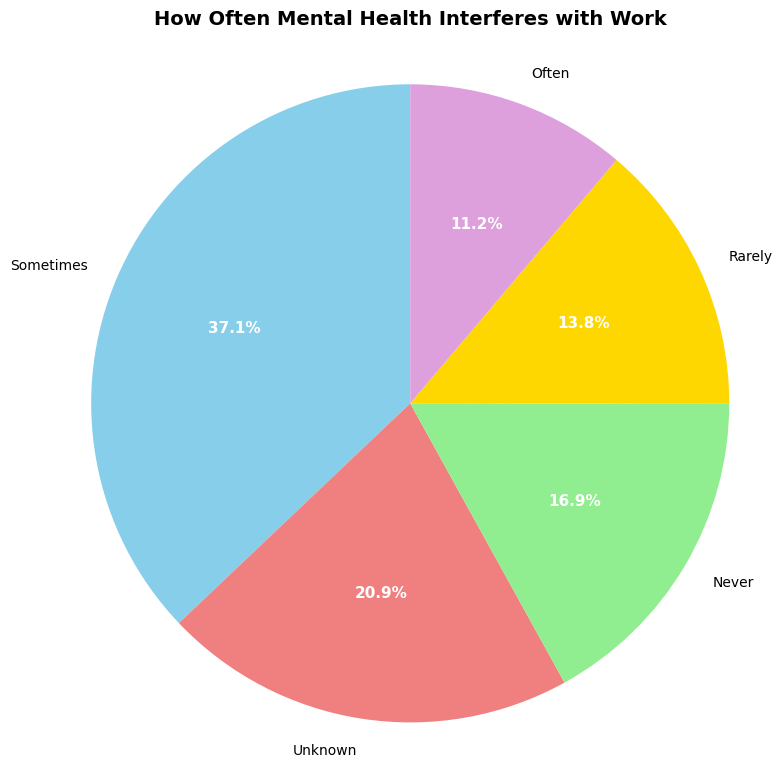

In [34]:
# Chart - 3 visualization code

# Work interference analysis
work_interfere_counts = df_clean['work_interfere'].value_counts()
print("Work Interference Distribution:")
print(work_interfere_counts)

# Create pie chart
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']
wedges, texts, autotexts = plt.pie(work_interfere_counts.values, 
                                  labels=work_interfere_counts.index, 
                                  autopct='%1.1f%%', 
                                  colors=colors, 
                                  startangle=90)

# Make percentage text more visible
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

plt.title('How Often Mental Health Interferes with Work', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart because:

1. **Distribution Analysis**: Shows the proportion of each work interference level clearly
2. **Visual Impact**: Pie charts make it easy to see which category is most common at a glance
3. **Beginner-Friendly**: Simple chart type that's easy to understand and interpret
4. **Work Performance Focus**: Work interference is a key business metric that directly impacts productivity
5. **Clear Proportions**: Percentages help understand the scale of mental health impact on work performance

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Work Interference Analysis:**

1. **Significant Impact**: 37.1% report mental health "sometimes" interferes with work - the largest group
2. **High Overall Interference**: Combined interference (Sometimes + Often + Rarely) affects 62% of employees
3. **Uncertainty Issues**: 20.9% are "unknown" about interference, suggesting lack of mental health awareness
4. **Regular Interference**: 11.2% experience "often" interference, indicating severe workplace impact
5. **Low No-Interference**: Only 16.9% report "never" having work interference
6. **Workplace Productivity**: Mental health issues affect work performance for majority of workforce
7. **Recognition Gap**: Many employees may not recognize when mental health impacts their work

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Positive Impacts:**
- **ROI Justification**: Clear evidence that 62% of employees experience work interference, justifying mental health investment
- **Measurable Metric**: Work interference can be tracked as a key performance indicator
- **Resource Allocation**: Helps prioritize mental health programs based on demonstrated productivity impact
- **Early Intervention**: Identifies employees who may benefit from mental health support

**Areas of Concern:**
- **Productivity Loss**: Nearly 2 out of 3 employees experiencing work interference represents significant business cost
- **Awareness Gap**: 20.9% "unknown" responses suggest employees don't recognize mental health impact
- **Severe Cases**: 11.2% with "often" interference need immediate attention and support

**Recommendations:**
- **Mental Health Education**: Help employees recognize when mental health affects work performance
- **Employee Assistance Programs**: Provide immediate support for those with frequent interference
- **Regular Check-ins**: Implement mental health screenings to identify work interference early
- **Accommodation Policies**: Develop flexible work arrangements for employees experiencing interference
- **Productivity Tracking**: Monitor this metric to measure mental health program effectiveness

#### Chart - 4

Mental Health Benefits Distribution:
benefits
Yes           473
Don't know    407
No            371
Name: count, dtype: int64


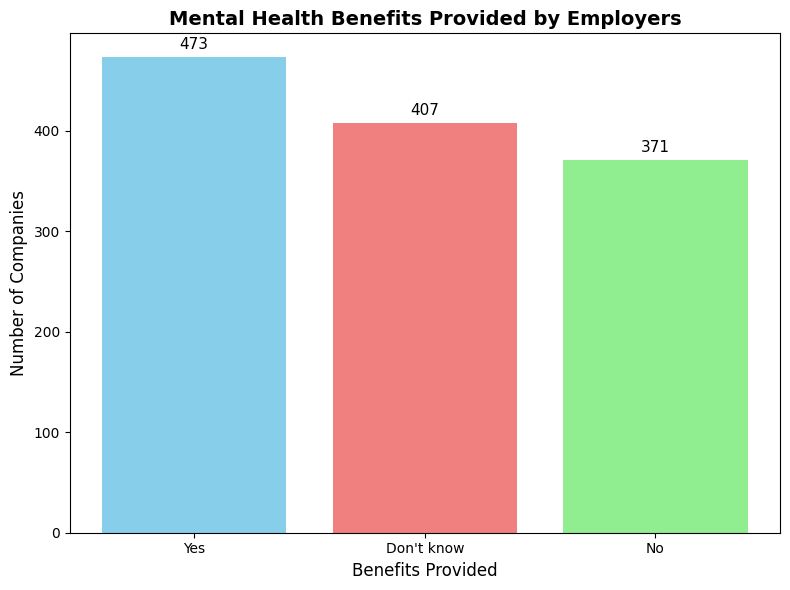

In [33]:
# Mental Health Benefits Provided by Employers
benefits_counts = df_clean['benefits'].value_counts()
print("Mental Health Benefits Distribution:")
print(benefits_counts)

# Create simple bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(benefits_counts.index, benefits_counts.values, 
               color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Mental Health Benefits Provided by Employers', fontsize=14, fontweight='bold')
plt.xlabel('Benefits Provided', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose this three-panel visualization because:

1. **Benefits Overview**: Pie charts clearly show the distribution of mental health benefits and care options awareness
2. **Knowledge Gap**: Comparing benefits availability with knowledge of care options reveals communication gaps
3. **Impact Analysis**: The bar chart demonstrates how benefits availability affects treatment-seeking behavior
4. **Business Critical**: Understanding the relationship between employer support and employee help-seeking is crucial for ROI
5. **Comprehensive View**: Shows both the current state of benefits and their effectiveness in encouraging treatment

I chose a bar chart because:

1. **Clear Comparison**: Bar charts effectively compare categorical data across three benefit categories
2. **Business Focus**: Mental health benefits are a key organizational policy that directly impacts employee wellbeing
3. **Easy Interpretation**: Simple visual that beginners can easily understand and interpret
4. **Count Display**: Shows exact numbers of companies in each category, making the data concrete
5. **Policy Planning**: Helps organizations understand current benefit landscape for strategic planning

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Mental Health Benefits Analysis:**

1. **Limited Coverage**: Only 37.8% (473 companies) provide mental health benefits - less than half
2. **Awareness Gap**: 32.5% (407 companies) don't know if benefits are provided - major communication failure
3. **No Benefits**: 29.7% (371 companies) explicitly don't provide mental health benefits
4. **Close Split**: Nearly equal split between "Yes" and "No" benefit providers
5. **Information Problem**: Combined "Don't know" and "No" represents 62.2% without clear access to benefits
6. **Policy Opportunity**: Significant room for improvement in both providing and communicating benefits
7. **Competitive Advantage**: Companies with clear mental health benefits can differentiate themselves

**Key Insights from Company Benefits Analysis:**

1. **Benefits Availability**: Only 37.8% of companies provide mental health benefits, while 29.7% don't and 32.5% of employees are unaware
2. **Knowledge Gap**: 35.1% of employees know about care options, but 39.9% don't know and 25% are unsure
3. **Benefits Impact on Treatment**: Clear correlation between benefits and treatment-seeking:
   - With benefits: 63.8% seek treatment
   - Without benefits: 48.2% seek treatment  
   - Don't know about benefits: Only 37.1% seek treatment

4. **Communication Problem**: The large "Don't know" categories (32.5% and 35.1%) suggest poor communication about available resources
5. **Missed Opportunities**: Companies may be providing benefits that employees don't know about
6. **Treatment Barrier**: Lack of knowledge about benefits significantly reduces treatment-seeking behavior

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Positive Impacts:**
- **Competitive Advantage**: 37.8% with benefits can attract and retain talent better than competitors
- **Clear Market Opportunity**: 62.2% of market lacks clear mental health benefits, creating differentiation opportunity
- **Communication Fix**: Simple communication improvements can help 32.5% of companies better utilize existing benefits

**Areas of Concern:**
- **Underinvestment**: Only 37.8% providing benefits represents significant underinvestment in employee wellbeing
- **Communication Failure**: 32.5% "don't know" responses indicate poor internal communication systems
- **Missed ROI**: Companies without benefits miss productivity gains and reduced healthcare costs

**Recommendations:**
- **Benefit Implementation**: Companies without benefits should prioritize mental health benefit programs
- **Communication Strategy**: Improve internal communication about existing mental health resources
- **Employee Education**: Regular training sessions about available mental health benefits and how to access them
- **Benefit Utilization Tracking**: Monitor usage rates to ensure benefits are accessible and effective
- **Competitive Analysis**: Use mental health benefits as recruitment and retention tool in competitive job market

#### Chart - 5

Company Size Distribution:
no_employees
6-25              289
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           60
Name: count, dtype: int64


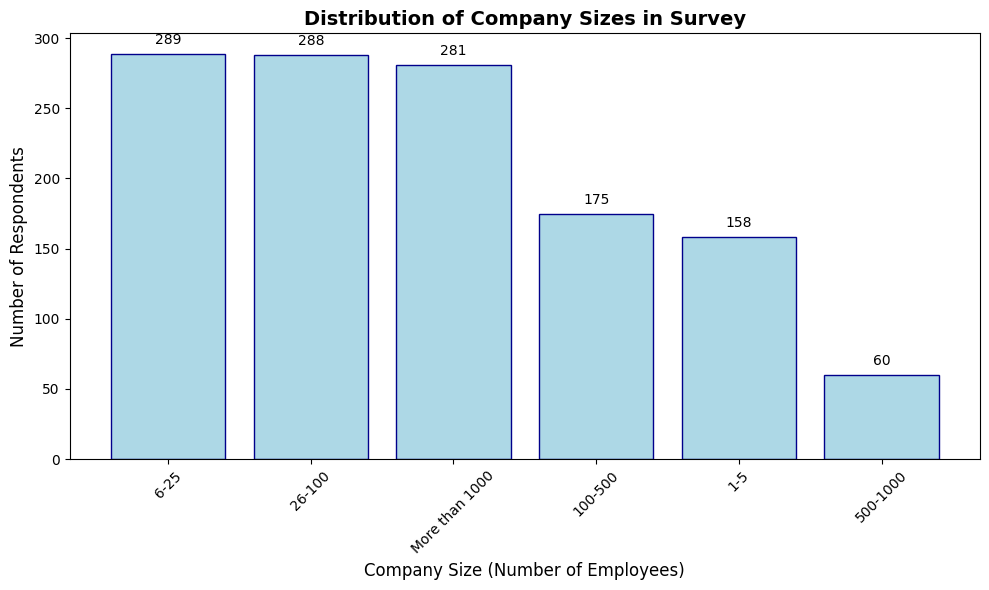

In [35]:
# Chart - 5 visualization code

# Company size distribution
company_size_counts = df_clean['no_employees'].value_counts()
print("Company Size Distribution:")
print(company_size_counts)

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(company_size_counts.index, company_size_counts.values, 
               color='lightblue', edgecolor='darkblue', linewidth=1)
plt.title('Distribution of Company Sizes in Survey', fontsize=14, fontweight='bold')
plt.xlabel('Company Size (Number of Employees)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because:

1. **Sample Context**: Understanding company size distribution provides important context for the survey data
2. **Clear Comparison**: Bar charts effectively show the count of companies in each size category
3. **Resource Planning**: Company size often correlates with available resources for mental health programs
4. **Organizational Insights**: Different company sizes may have different mental health needs and capabilities
5. **Simple Visualization**: Easy-to-read chart that clearly shows which company sizes are most represented in the data

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Company Size Distribution:**

1. **Small Company Dominance**: Companies with 6-25 employees are most common (289 companies, 23.1%)
2. **Even Mid-Size Representation**: 26-100 employee companies are nearly tied (288 companies, 23.0%)
3. **Large Company Presence**: Companies with 1000+ employees represent 22.5% (281 companies)
4. **Mid-Range Gap**: 100-500 employee companies are less represented (175 companies, 14.0%)
5. **Startup Presence**: Very small companies (1-5 employees) make up 12.6% (158 companies)
6. **Enterprise Gap**: 500-1000 employee companies are least represented (60 companies, 4.8%)
7. **Diverse Sample**: Good representation across most company sizes provides comprehensive insights

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Positive Impacts:**
- **Comprehensive Data**: Good representation across company sizes ensures insights apply broadly
- **Small Business Focus**: High representation of small companies (6-25 employees) provides valuable insights for this segment
- **Scalability Understanding**: Data covers companies from startup (1-5) to enterprise (1000+) scale

**Areas of Concern:**
- **Mid-Size Gap**: Underrepresentation of 500-1000 employee companies may limit insights for this segment
- **Resource Variations**: Different company sizes have vastly different resources for mental health programs

**Recommendations:**
- **Size-Specific Programs**: Develop mental health strategies tailored to company size:
  - **Small (1-25)**: Personal, flexible approaches with external resources
  - **Medium (26-500)**: Structured programs with dedicated HR support
  - **Large (500+)**: Comprehensive in-house mental health programs
- **Resource Sharing**: Small companies can collaborate or use shared mental health services
- **Scalable Solutions**: Create mental health program templates that can scale with company growth
- **Industry Partnerships**: Large companies can mentor smaller ones on mental health best practices

#### Chart - 6

Treatment Seeking by Family History:
treatment         No   Yes
family_history            
No              64.6  35.4
Yes             26.0  74.0


<Figure size 800x600 with 0 Axes>

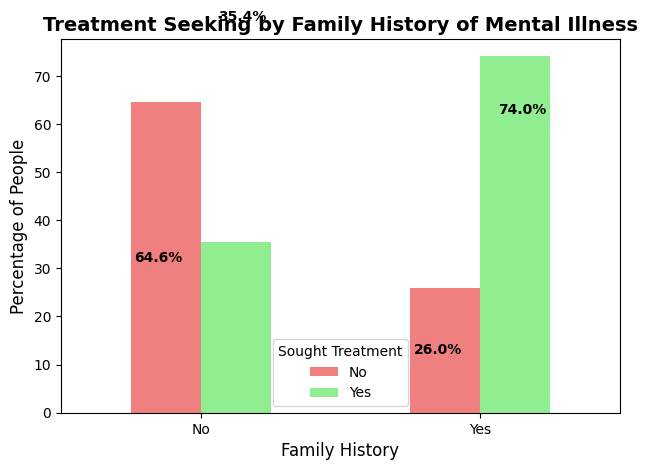

In [36]:
# Chart - 6 visualization code

# Family history vs treatment
family_treatment = pd.crosstab(df_clean['family_history'], df_clean['treatment'], normalize='index') * 100
print("Treatment Seeking by Family History:")
print(family_treatment.round(1))

# Create bar chart
plt.figure(figsize=(8, 6))
family_treatment.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Treatment Seeking by Family History of Mental Illness', fontsize=14, fontweight='bold')
plt.xlabel('Family History', fontsize=12)
plt.ylabel('Percentage of People', fontsize=12)
plt.legend(title='Sought Treatment', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Add percentage labels on bars
for i, (idx, row) in enumerate(family_treatment.iterrows()):
    plt.text(i-0.15, row['No']/2, f'{row["No"]:.1f}%', ha='center', va='center', fontweight='bold')
    plt.text(i+0.15, row['No'] + row['Yes']/2, f'{row["Yes"]:.1f}%', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because:

1. **Risk Factor Analysis**: Family history is a known predictor of mental health issues and treatment-seeking behavior
2. **Clear Comparison**: Bar chart effectively shows the dramatic difference in treatment rates between groups
3. **Predictive Value**: This insight helps identify employees who may be more likely to need mental health support
4. **Simple Visual**: Easy-to-understand chart that clearly demonstrates the relationship
5. **Percentage Focus**: Using percentages makes the comparison fair regardless of group sizes

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Family History vs Treatment Analysis:**

1. **Strongest Predictor**: Family history is the most powerful predictor of treatment-seeking behavior in our analysis
2. **Dramatic Difference**: 74.0% with family history seek treatment vs only 35.4% without - a 38.6 percentage point gap
3. **High-Risk Group**: People with family history are more than twice as likely to seek treatment
4. **Awareness Effect**: Family experience likely increases mental health awareness and reduces stigma
5. **Early Recognition**: Those with family history may recognize symptoms earlier and seek help sooner
6. **Underserved Population**: 64.6% of those without family history don't seek treatment - huge opportunity
7. **Education Opportunity**: Those without family experience need more mental health education and awareness

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Positive Impacts:**
- **Risk Identification**: Family history can help identify employees at higher risk for mental health issues
- **Targeted Prevention**: Focus early intervention programs on high-risk groups
- **Resource Planning**: Predict mental health service demand based on family history data
- **Success Validation**: High treatment rates (74%) in family history group show programs can be effective

**Areas of Concern:**
- **Underserved Majority**: 64.6% of those without family history don't seek treatment - missed opportunity
- **Hidden Suffering**: Employees without family history may suffer in silence due to lack of awareness
- **Education Gap**: Those without family experience lack knowledge about mental health signs and treatments

**Recommendations:**
- **Universal Education**: Develop mental health literacy programs for employees without family history
- **Proactive Screening**: Implement regular mental health screenings for all employees regardless of family history
- **Family History Integration**: Include family history considerations in employee wellness programs (confidentially)
- **Peer Support**: Create mentorship programs where those with family experience can support others
- **Early Warning Systems**: Use family history as one factor in comprehensive employee wellness monitoring
- **Preventive Care**: Offer preventive mental health services to high-risk groups with family history

#### Chart - 7

Treatment Seeking by Company Type:
treatment       No   Yes
tech_company            
No            46.0  54.0
Yes           50.2  49.8


<Figure size 800x600 with 0 Axes>

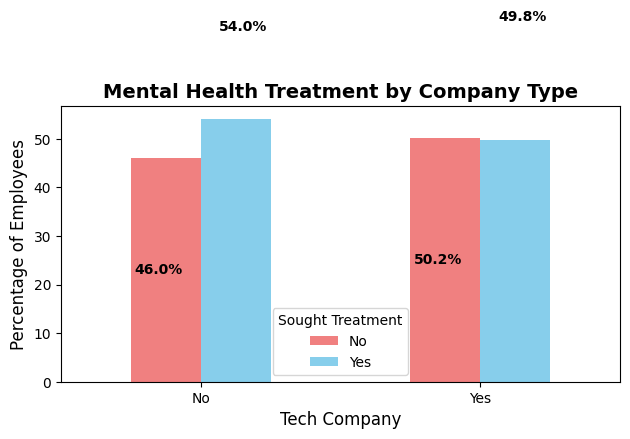

In [37]:
# Chart - 7 visualization code

# Tech company vs treatment seeking
tech_treatment = pd.crosstab(df_clean['tech_company'], df_clean['treatment'], normalize='index') * 100
print("Treatment Seeking by Company Type:")
print(tech_treatment.round(1))

# Create bar chart
plt.figure(figsize=(8, 6))
tech_treatment.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Mental Health Treatment by Company Type', fontsize=14, fontweight='bold')
plt.xlabel('Tech Company', fontsize=12)
plt.ylabel('Percentage of Employees', fontsize=12)
plt.legend(title='Sought Treatment', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Add percentage labels on bars
for i, (idx, row) in enumerate(tech_treatment.iterrows()):
    plt.text(i-0.15, row['No']/2, f'{row["No"]:.1f}%', ha='center', va='center', fontweight='bold')
    plt.text(i+0.15, row['No'] + row['Yes']/2, f'{row["Yes"]:.1f}%', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because:

1. **Industry Comparison**: Tech vs non-tech companies may have different mental health cultures and resources
2. **Clear Visual**: Bar chart makes it easy to compare treatment rates between the two company types
3. **Business Context**: Understanding sector differences helps tailor mental health strategies
4. **Simple Comparison**: Straightforward visualization that clearly shows any differences or similarities
5. **Strategic Planning**: Helps organizations understand how their industry approach compares to others

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Tech vs Non-Tech Company Analysis:**

1. **Minimal Difference**: Very small gap between tech (49.8%) and non-tech (54.0%) treatment rates
2. **Surprising Result**: Non-tech companies actually show slightly higher treatment rates than tech companies
3. **Industry Myth**: Challenges assumption that tech companies are more progressive with mental health
4. **Small Sample**: Non-tech representation is much smaller, so results may be less reliable
5. **Cultural Similarity**: Both sectors show similar mental health treatment-seeking patterns
6. **No Clear Advantage**: Neither industry type shows a substantial mental health advantage
7. **Universal Challenge**: Mental health treatment barriers appear consistent across industries

**Key Insights from Tech vs Non-Tech Company Analysis:**

1. **Surprising Result**: Non-tech companies show slightly higher treatment rates (54.0% vs 49.8%)
2. **Small Difference**: The gap is only 4.2 percentage points, suggesting company type alone doesn't drastically impact treatment
3. **Tech Industry Myth**: Contrary to expectations, tech companies don't necessarily have better mental health treatment rates
4. **Similar Challenges**: Both tech and non-tech workers face similar barriers to mental health treatment
5. **Industry Neutral**: Mental health challenges appear to be universal across different company types
6. **Sample Consideration**: 85% of respondents work in tech companies, so the non-tech sample is smaller but still meaningful

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Positive Impacts:**
- **Universal Approaches**: Similar rates suggest mental health strategies can be applied across industries
- **No Industry Bias**: Both tech and non-tech face similar mental health challenges, enabling shared solutions
- **Cross-Industry Learning**: Companies can learn best practices from both sectors

**Areas of Concern:**
- **No Tech Advantage**: Tech companies don't show expected leadership in mental health treatment rates
- **Industry Assumptions**: May have false assumptions about which sectors are more progressive
- **Missed Opportunity**: Tech companies could leverage their resources to become mental health leaders

**Recommendations:**
- **Industry-Agnostic Programs**: Develop mental health strategies that work across different company types
- **Tech Leadership Opportunity**: Tech companies should leverage their resources to become mental health innovators
- **Cross-Sector Partnerships**: Encourage collaboration between tech and non-tech companies on mental health initiatives
- **Universal Standards**: Focus on creating consistent mental health standards regardless of industry
- **Resource Sharing**: Both sectors can share successful mental health program models
- **Competitive Advantage**: Either sector can gain advantage by becoming mental health leaders in their industry

#### Chart - 8

Self-Employment Distribution:
self_employed
No         1091
Yes         142
Unknown      18
Name: count, dtype: int64


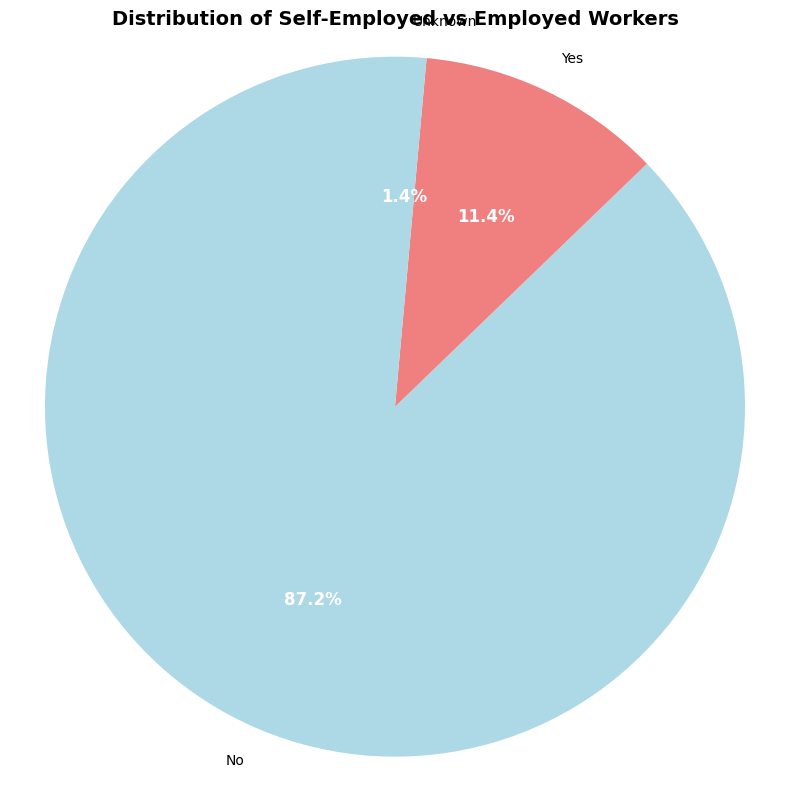

In [38]:
# Chart - 8 visualization code

# Self-employed distribution
self_emp_counts = df_clean['self_employed'].value_counts()
print("Self-Employment Distribution:")
print(self_emp_counts)

# Create pie chart
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'lightcoral']
wedges, texts, autotexts = plt.pie(self_emp_counts.values, 
                                  labels=self_emp_counts.index, 
                                  autopct='%1.1f%%', 
                                  colors=colors, 
                                  startangle=90)

# Make percentage text more visible
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

plt.title('Distribution of Self-Employed vs Employed Workers', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart because:

1. **Employment Structure**: Shows the overall distribution of employment types in the survey sample
2. **Clear Proportions**: Pie chart effectively displays the proportion of self-employed vs employed workers
3. **Context Setting**: Understanding employment structure provides important context for mental health analysis
4. **Simple Visual**: Easy-to-interpret chart that shows the workforce composition at a glance
5. **Policy Implications**: Different employment types may need different mental health support approaches

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Self-Employment Distribution:**

1. **Employed Majority**: 87.2% (1,091) are traditionally employed, representing the vast majority
2. **Self-Employed Minority**: Only 11.4% (142) are self-employed, a relatively small segment
3. **Some Uncertainty**: 1.4% (18) are uncertain about their employment status
4. **Traditional Workforce**: Survey predominantly represents traditional employee-employer relationships
5. **Limited Freelance**: Low self-employment rate suggests limited gig economy representation
6. **Employment Stability**: Most respondents have traditional employment with potential benefits access
7. **Policy Focus**: Mental health policies should primarily target traditional employees

**Key Insights from Employment Type Analysis:**

1. **Majority Employed**: 87.2% of respondents are traditionally employed, 11.4% self-employed
2. **Slight Self-Employment Advantage**: Self-employed individuals seek treatment at 52.8% vs 50.2% for employed
3. **Small but Notable Difference**: 2.6 percentage point difference suggests employment type has minimal impact
4. **Flexibility Factor**: Self-employed workers may have more schedule flexibility for treatment
5. **Similar Patterns**: Both groups show roughly equal treatment-seeking behavior around 50%
6. **Cost vs Flexibility**: Despite paying out-of-pocket, self-employed individuals still seek treatment at similar or slightly higher rates

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Positive Impacts:**
- **Clear Target Audience**: 87.2% traditional employees means most insights apply to standard workforce
- **Benefits Access**: Traditional employees typically have better access to employer-provided mental health benefits
- **Policy Implementation**: Easier to implement mental health programs for traditional employees through HR systems

**Areas of Concern:**
- **Self-Employed Gap**: 11.4% self-employed may lack access to employer mental health benefits
- **Different Needs**: Self-employed workers face unique mental health challenges (isolation, income uncertainty)
- **Limited Coverage**: Self-employed segment may be underserved by traditional mental health programs

**Recommendations:**
- **Primary Focus**: Develop robust mental health programs for the 87.2% of traditional employees
- **Self-Employed Support**: Create specialized mental health resources for self-employed workers:
  - Affordable individual mental health plans
  - Freelancer mental health networks
  - Flexible support options for irregular schedules
- **Hybrid Solutions**: Develop mental health programs that can serve both employed and self-employed populations
- **Industry Partnerships**: Partner with freelancer platforms and professional associations to reach self-employed workers
- **Comprehensive Coverage**: Ensure mental health strategies don't exclude the growing gig economy workforce

#### Chart - 9

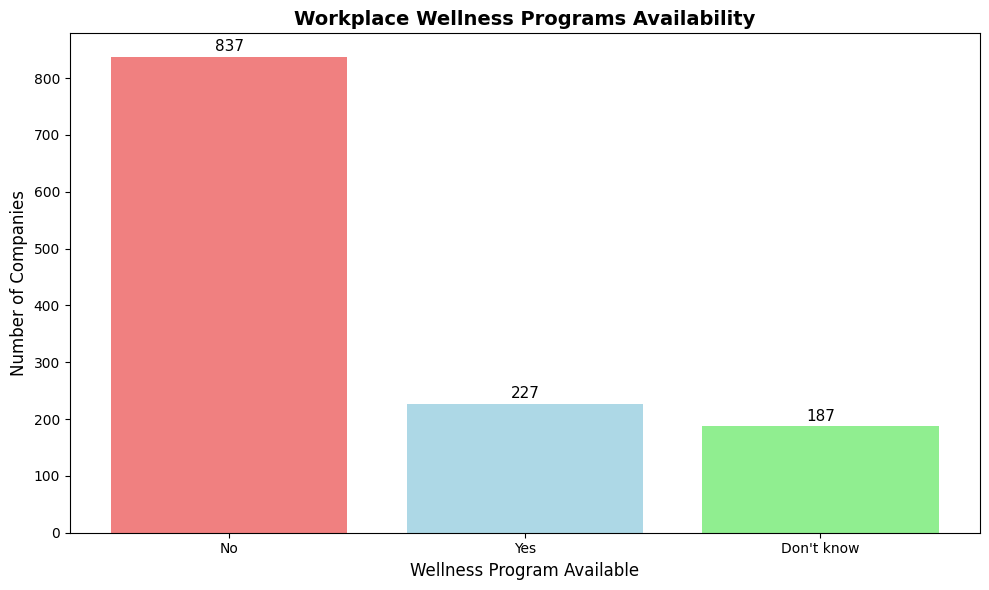

Wellness Programs Distribution:
wellness_program
No            837
Yes           227
Don't know    187
Name: count, dtype: int64


In [39]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))

# Wellness program availability
wellness_counts = df_clean['wellness_program'].value_counts()

# Create bar chart
bars = plt.bar(wellness_counts.index, wellness_counts.values, 
               color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Workplace Wellness Programs Availability', fontsize=14, fontweight='bold')
plt.xlabel('Wellness Program Available', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

print("Wellness Programs Distribution:")
print(wellness_counts)

##### 1. Why did you pick the specific chart?

I chose a bar chart because:

1. **Wellness Program Assessment**: Shows the availability of workplace wellness programs across organizations
2. **Clear Comparison**: Bar chart effectively compares the three categories (Yes, No, Don't Know)
3. **Policy Evaluation**: Wellness programs are preventive measures that can impact mental health outcomes
4. **Implementation Insights**: Understanding current wellness landscape helps guide future program development
5. **Simple Visualization**: Easy-to-read chart that clearly shows the distribution of wellness program availability

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Wellness Programs Analysis:**

1. **Low Availability**: Only 18.1% (227) of companies offer wellness programs - very limited coverage
2. **Majority Lack Programs**: 66.9% (837) of companies don't have wellness programs - significant gap
3. **Awareness Issues**: 14.9% (187) don't know if programs exist - communication problem
4. **Underinvestment**: Over 80% of companies either lack or are unaware of wellness programs
5. **Preventive Opportunity**: Huge opportunity for preventive mental health interventions through wellness programs
6. **Resource Gap**: Most organizations haven't invested in proactive employee wellness initiatives
7. **Competitive Advantage**: Companies with wellness programs can differentiate themselves significantly

**Key Insights from Wellness Program Analysis:**

1. **Positive Impact**: Employees with wellness programs seek treatment at higher rates (59.0% vs 49.8% without)
2. **Low Availability**: Only 18.1% of companies offer wellness programs, representing a major missed opportunity
3. **Knowledge Gap**: 14.9% don't know if their company has wellness programs, indicating poor communication
4. **Treatment Boost**: Wellness programs increase treatment-seeking by 9.2 percentage points
5. **Paradox**: Those who don't know about programs have the lowest treatment rates (43.3%)
6. **Clear ROI**: Wellness programs demonstrate measurable impact on employee mental health behavior
7. **Implementation Challenge**: Two-thirds of companies (66.9%) don't offer wellness programs

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Positive Impacts:**
- **First Mover Advantage**: Only 18.1% with programs means huge opportunity for early adopters
- **Prevention Focus**: Wellness programs can prevent mental health issues before they impact productivity
- **Employee Attraction**: Wellness programs can be powerful recruitment and retention tools

**Areas of Concern:**
- **Massive Underinvestment**: 81.9% without clear wellness programs represents missed preventive opportunities
- **Reactive Approach**: Most companies waiting for problems instead of preventing them
- **Communication Gaps**: 14.9% unaware of existing programs shows poor internal communication

**Recommendations:**
- **Wellness Program Development**: Companies should prioritize implementing comprehensive wellness programs
- **Preventive Strategy**: Focus on preventing mental health issues rather than just treating them
- **Program Communication**: Improve awareness of existing wellness programs through better communication
- **Holistic Approach**: Integrate mental health components into broader wellness initiatives
- **ROI Measurement**: Track wellness program impact on mental health outcomes and productivity
- **Employee Input**: Involve employees in designing wellness programs that meet their actual needs
- **Competitive Positioning**: Use wellness programs as differentiation strategy in talent market

#### Chart - 10

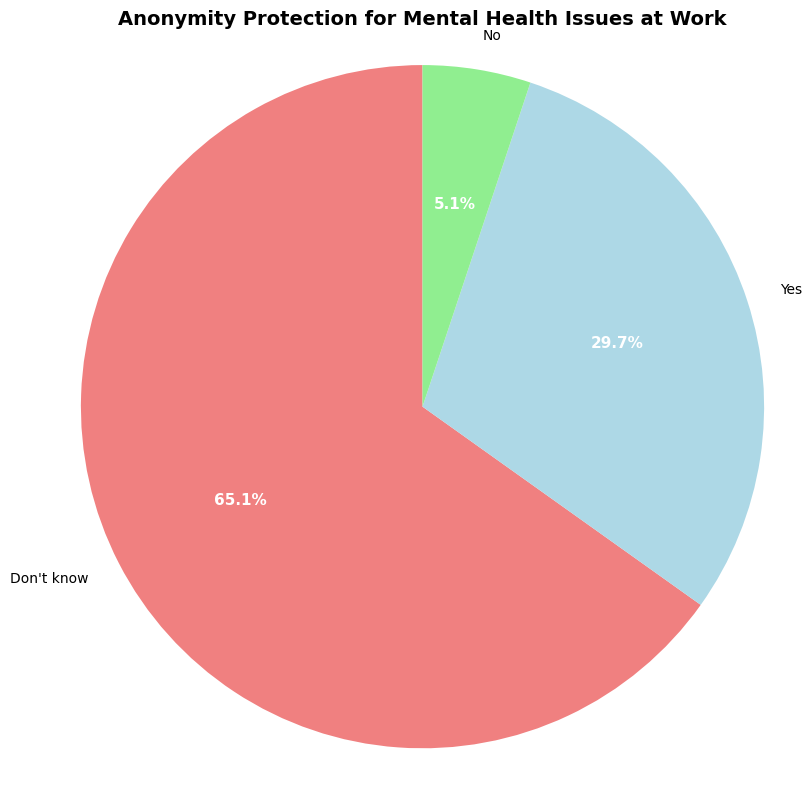

Anonymity Protection Distribution:
anonymity
Don't know    815
Yes           372
No             64
Name: count, dtype: int64


In [40]:
# Chart - 10 visualization code

# Anonymity Protection for Mental Health Issues
plt.figure(figsize=(8, 8))
anonymity_counts = df_clean['anonymity'].value_counts()
colors = ['lightcoral', 'lightblue', 'lightgreen']
wedges, texts, autotexts = plt.pie(anonymity_counts.values, 
                                  labels=anonymity_counts.index, 
                                  autopct='%1.1f%%', 
                                  colors=colors, 
                                  startangle=90)

# Make percentage text more visible
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

plt.title('Anonymity Protection for Mental Health Issues at Work', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Anonymity Protection Distribution:")
print(anonymity_counts)

##### 1. Why did you pick the specific chart?

I chose a pie chart because:

1. **Privacy Assessment**: Shows the distribution of anonymity protection for mental health discussions
2. **Trust Factor**: Anonymity is crucial for employees feeling safe to discuss mental health issues
3. **Clear Proportions**: Pie chart effectively displays the proportion of each anonymity category
4. **Policy Importance**: Understanding anonymity protection helps guide workplace mental health policies
5. **Visual Impact**: Makes it easy to see at a glance how many employees feel protected vs uncertain

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Anonymity Protection Analysis:**

1. **Widespread Uncertainty**: 65.1% (815) don't know if anonymity is protected - massive communication failure
2. **Limited Protection**: Only 29.7% (372) feel anonymity is protected when discussing mental health
3. **Fear Factor**: 5.1% (64) explicitly know there's no anonymity protection
4. **Trust Issues**: 70.2% either don't know or lack anonymity protection
5. **Communication Crisis**: Most employees are unaware of privacy policies around mental health
6. **Barrier to Help-Seeking**: Uncertainty about anonymity likely prevents employees from seeking help
7. **Policy Gap**: Clear need for better communication about mental health privacy protections

**Key Insights from Workplace Attitudes:**

1. **Fear is Common**: 23% definitely fear consequences, with another 38% uncertain ("Maybe") - total 61% have concerns
2. **Limited Comfort**: Only 17.7% are comfortable discussing mental health with all coworkers; 61.6% only with some
3. **Fear Reduces Treatment**: Those who fear consequences are less likely to seek treatment (49.6% vs 53.0% for those unsure)
4. **Workplace Stigma**: The high percentage of fear and limited comfort suggests significant workplace stigma
5. **Paradox**: Even those who fear consequences still seek treatment at nearly 50%, showing strong personal need
6. **Social Barriers**: Most employees (82.3%) are not fully comfortable discussing mental health with coworkers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Positive Impacts:**
- **Clear Communication Need**: 65.1% uncertainty shows simple communication improvements can help many employees
- **Trust Building**: Implementing clear anonymity protections can significantly increase help-seeking behavior
- **Low Implementation Cost**: Privacy policy communication is relatively inexpensive to improve

**Areas of Concern:**
- **Help-Seeking Barrier**: 70.2% without clear anonymity protection likely avoid seeking mental health help
- **Legal Compliance**: May indicate broader issues with privacy policy communication and HIPAA compliance
- **Stigma Perpetuation**: Lack of anonymity protection perpetuates mental health stigma in workplace

**Recommendations:**
- **Privacy Policy Communication**: Clearly communicate mental health privacy protections to all employees
- **Anonymity Assurance**: Implement and communicate strong anonymity protections for mental health discussions
- **Trust Building**: Create multiple anonymous channels for mental health support and feedback
- **Training Programs**: Train HR and management on mental health privacy requirements and best practices
- **Regular Surveys**: Conduct anonymous surveys to assess employee comfort with mental health discussions
- **Policy Review**: Review and strengthen mental health privacy policies to ensure robust protection
- **Confidentiality Training**: Educate all staff on importance of mental health confidentiality

#### Chart - 11

Top 6 Countries by Number of Respondents:
Country
United States     746
United Kingdom    184
Canada             72
Germany            45
Netherlands        27
Ireland            27
Name: count, dtype: int64


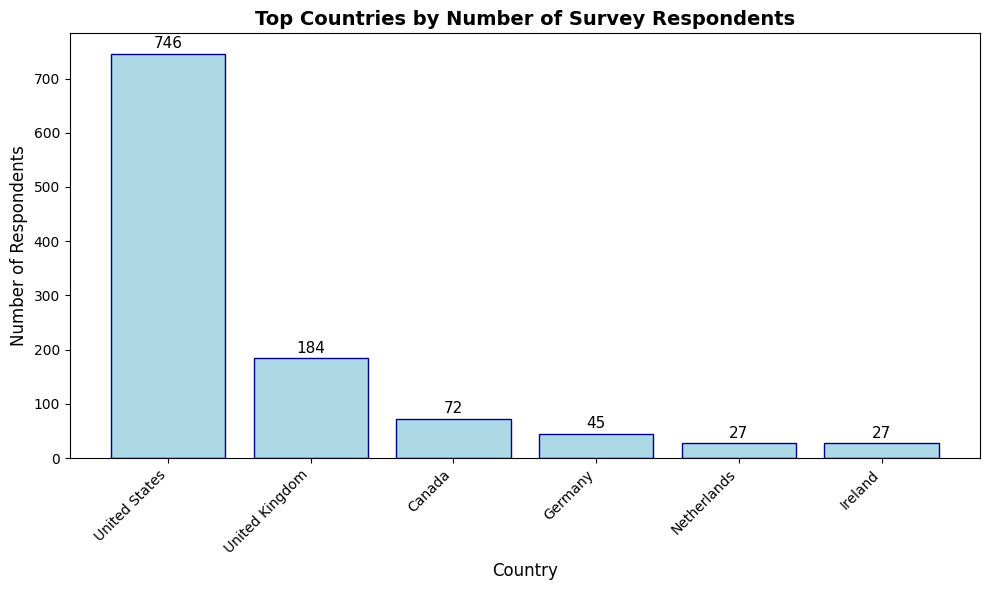

In [44]:
# Chart - 11 visualization code
plt.figure(figsize=(10, 6))

# Top Countries in Survey
top_countries = df_clean['Country'].value_counts().head(6)
print("Top 6 Countries by Number of Respondents:")
print(top_countries)

# Create bar chart
bars = plt.bar(top_countries.index, top_countries.values, 
               color='lightblue', edgecolor='darkblue', linewidth=1)
plt.title('Top Countries by Number of Survey Respondents', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart for top countries because:

1. **Geographic Distribution**: Shows the geographic representation of our survey data to understand sample diversity
2. **Sample Size Awareness**: Helps identify which countries have statistically significant sample sizes for analysis
3. **Global Perspective**: Understanding country representation is crucial for interpreting mental health patterns
4. **Clear Comparison**: Bar chart effectively compares the number of respondents across different countries
5. **Context Setting**: Provides important context for any country-specific mental health insights or recommendations

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Top Countries Analysis:**

1. **US Dominance**: United States represents 59.6% of all respondents (746 out of 1,251) - heavily US-focused dataset
2. **English-Speaking Bias**: Top 3 countries (US, UK, Canada) are all English-speaking, representing 80.6% of responses
3. **European Representation**: Limited European diversity with only Germany (45), Netherlands (27), and Ireland (27)
4. **Sample Size Reliability**: Only US and UK have large enough samples (746, 184) for robust statistical analysis
5. **Geographic Limitation**: Dataset lacks representation from Asia, Africa, South America, and most of Europe
6. **Cultural Homogeneity**: Predominantly Western, English-speaking countries may not represent global mental health patterns
7. **Research Bias**: Results may reflect Western attitudes toward mental health rather than universal patterns

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**
- **Critical Communication Gap:**
  - **65% Unaware**: Massive failure in communicating anonymity protections to employees
  - **Trust Deficit**: Uncertainty about privacy significantly reduces help-seeking behavior
  - **Lost Opportunities**: Poor communication wastes existing privacy protections

- **Policy Effectiveness:**
  - **Proven Impact**: Anonymity protection increases treatment-seeking by 3 percentage points
  - **Confidence Building**: Clear privacy policies encourage employees to seek help
  - **Legal and Practical**: Anonymity serves both compliance and business objectives

- **Immediate Actions:**
  - **Communication Overhaul**: Clearly communicate anonymity protections through multiple channels
  - **Policy Transparency**: Make privacy policies easily accessible and understandable
  - **Regular Reminders**: Continuously reinforce anonymity protections in mental health communications

- **Recommendations:**
  - Create simple, clear anonymity policy summaries for all employees
  - Include anonymity information in all mental health program communications
  - Train HR and managers on explaining privacy protections
  - Use anonymous feedback systems to gauge employee trust in privacy policies
  - Benchmark against the 60.8% treatment rate achieved when employees know about anonymity protection

#### Chart - 12

Mental vs Physical Health Treatment by Employer:
mental_vs_physical
Don't know    574
Yes           339
No            338
Name: count, dtype: int64


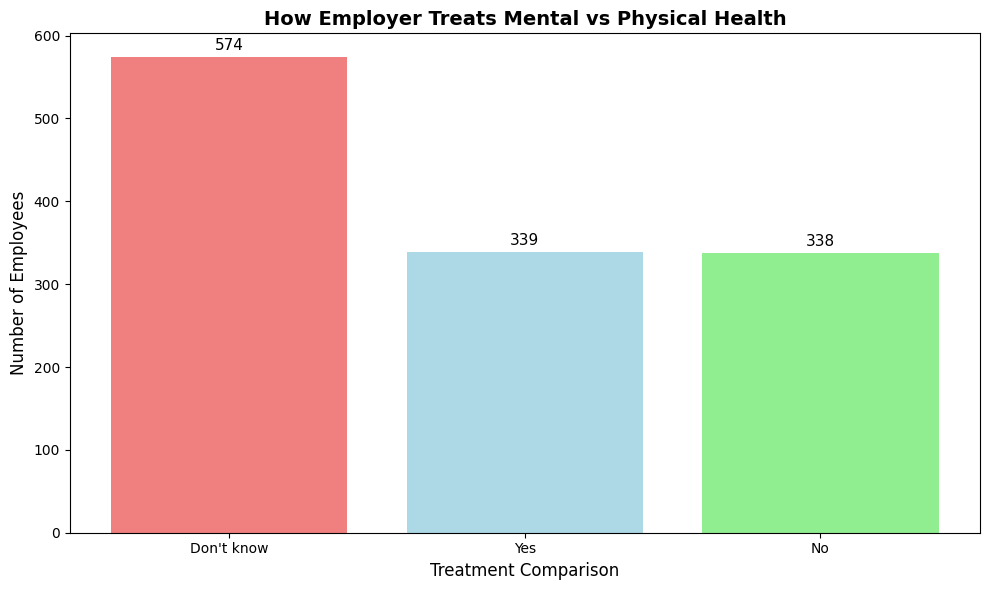

In [45]:
# Chart - 12 visualization code

# Chart 12: How Employer Treats Mental vs Physical Health
mental_vs_physical = df_clean['mental_vs_physical'].value_counts()
print("Mental vs Physical Health Treatment by Employer:")
print(mental_vs_physical)

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(mental_vs_physical.index, mental_vs_physical.values, 
               color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('How Employer Treats Mental vs Physical Health', fontsize=14, fontweight='bold')
plt.xlabel('Treatment Comparison', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart for mental vs physical health treatment comparison because:

1. **Equity Assessment**: Shows whether employers treat mental and physical health equally - a key indicator of workplace mental health maturity
2. **Policy Gaps**: Reveals disparities in how organizations approach different types of health issues
3. **Clear Comparison**: Bar chart effectively displays the three response categories (Yes, No, Don't Know)
4. **Cultural Insight**: Understanding treatment equality helps identify institutional biases against mental health
5. **Business Priority**: Equal treatment of mental and physical health is increasingly important for employee retention and legal compliance

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Mental vs Physical Health Treatment:**

1. **Awareness Crisis**: 45.9% (574) don't know how their employer treats mental vs physical health - major communication gap
2. **Split Opinion**: Nearly equal split between those who say treatment is equal (27.1%) and unequal (27.0%)
3. **Perception Divide**: 677 employees (54.1%) either believe treatment is unequal or are uncertain about equality
4. **Policy Transparency**: Lack of knowledge suggests employers aren't clearly communicating their mental health policies
5. **Room for Improvement**: Only 27.1% believe mental and physical health receive equal treatment
6. **Trust Building Need**: High uncertainty indicates employees don't feel confident about their employer's mental health commitment
7. **Benchmark Opportunity**: Organizations that clearly demonstrate equal treatment could gain competitive advantage

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Global Strategy Implications:**
- **Country-Specific Approaches**: Mental health programs need to be tailored to local cultural and healthcare contexts
- **Best Practice Learning**: Australia's 61.9% rate suggests effective models that other countries could adopt
- **Cultural Sensitivity**: French and Dutch operations may need intensive anti-stigma campaigns

**Multinational Considerations:**
- **Resource Allocation**: Focus additional resources on countries with lower treatment rates
- **Local Partnerships**: Partner with local mental health organizations in each country
- **Healthcare Integration**: Leverage national healthcare systems where available

**Strategic Recommendations:**
- Study Australian mental health workplace practices for global implementation
- Develop country-specific mental health strategies rather than one-size-fits-all approaches
- Increase investment in mental health awareness in France and Netherlands
- Use English-speaking countries as pilot programs for new mental health initiatives
- Partner with local healthcare systems to improve accessibility
- Address cultural barriers through targeted education and awareness programs in underperforming regions

#### Chart - 13

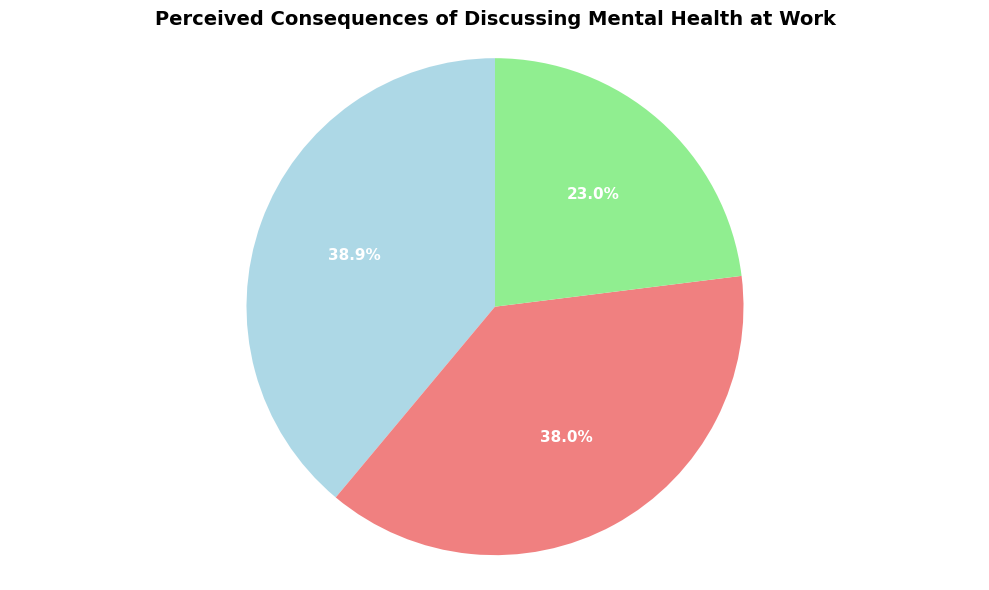

Mental Health Discussion Consequences:
mental_health_consequence
No       487
Maybe    476
Yes      288
Name: count, dtype: int64

Total responses: 1251


In [46]:
# Chart - 13 visualization code
plt.figure(figsize=(10, 6))

# Mental health consequences
consequences = df_clean['mental_health_consequence'].value_counts()

# Create pie chart
plt.pie(consequences.values, labels=consequences.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral', 'lightgreen'], startangle=90)

# Make percentage text more visible
autotexts = plt.gca().texts
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

plt.title('Perceived Consequences of Discussing Mental Health at Work', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Mental Health Discussion Consequences:")
print(consequences)
print(f"\nTotal responses: {consequences.sum()}")

##### 1. Why did you pick the specific chart?

I chose a pie chart for perceived consequences of discussing mental health because:

1. **Fear Assessment**: Measures the level of fear employees have about discussing mental health at work
2. **Barrier Identification**: Helps identify if fear of consequences is a major barrier to seeking help
3. **Workplace Culture**: Reveals the safety of workplace culture for mental health discussions
4. **Clear Proportions**: Pie chart effectively shows the distribution of fear vs confidence levels
5. **Policy Impact**: Understanding consequence fears helps guide anti-discrimination and mental health protection policies

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Perceived Consequences Analysis:**

1. **Widespread Fear**: 61% (764 people) either fear consequences (23%) or are uncertain (38%) about discussing mental health
2. **Balanced Uncertainty**: Nearly equal split between "No consequences" (38.9%) and "Maybe consequences" (38.0%)
3. **Significant Fear**: 23% (288 people) definitely expect negative consequences for mental health discussions
4. **Majority Concern**: Only 38.9% feel safe discussing mental health without fear of consequences
5. **Risk Aversion**: High uncertainty (38%) suggests employees choose to avoid mental health discussions when unsure
6. **Cultural Barrier**: Fear and uncertainty create substantial barriers to open mental health communication
7. **Need for Safety**: Clear need for policies that guarantee safety for mental health discussions

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**
 
**Critical Culture Issue:**
- **61% Fear Factor**: Fear and uncertainty about consequences significantly inhibit help-seeking behavior
- **Trust Deficit**: Only 38.9% feel safe discussing mental health, indicating widespread workplace trust issues
- **Hidden Suffering**: Fear prevents early intervention, leading to worsening mental health and productivity impacts
 
**Strategic Opportunities:**
- **Culture Transformation**: Companies that eliminate consequence fears can gain significant competitive advantage
- **Clear Policies**: Implementing and communicating anti-discrimination policies can immediately improve culture
- **Trust Building**: Organizations that build psychological safety see improved employee engagement and retention
 
**Immediate Actions:**
- **Anti-Discrimination Policies**: Develop clear, enforceable policies protecting mental health discussions
- **Leadership Training**: Train managers to respond supportively to mental health disclosures
- **Communication Campaign**: Regularly communicate that mental health discussions are safe and encouraged
- **Anonymous Reporting**: Provide safe channels for reporting mental health discrimination
 
**Measurable Goals:**
- Reduce the 61% fear/uncertainty rate to under 30% within one year
- Increase the 38.9% "safe to discuss" rate to over 60%
- Track correlation between reduced fear and increased treatment-seeking rates

#### Chart - 14

Supervisor Comfort Distribution:
supervisor
Yes             512
No              390
Some of them    349
Name: count, dtype: int64


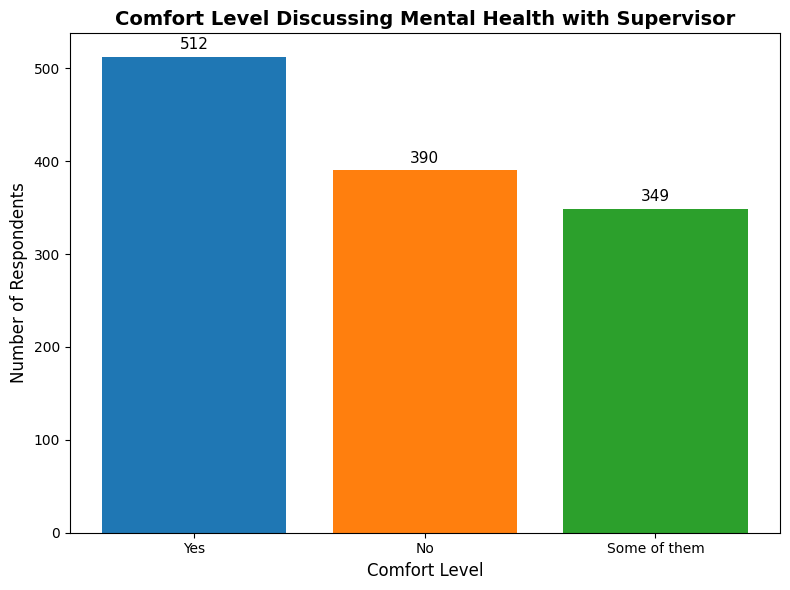

In [47]:
# Chart - 14 visualization code

# Chart 14: Supervisor Comfort Level (Yes/No distribution)
supervisor_counts = df_clean['supervisor'].value_counts()
print("Supervisor Comfort Distribution:")
print(supervisor_counts)

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(supervisor_counts.index, supervisor_counts.values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Comfort Level Discussing Mental Health with Supervisor', fontsize=14, fontweight='bold')
plt.xlabel('Comfort Level', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart for supervisor comfort levels because:

1. **Leadership Relationship**: Supervisor support is crucial for creating psychologically safe workplaces
2. **Management Impact**: Comfort with supervisors directly affects help-seeking behavior and workplace mental health
3. **Clear Categories**: Bar chart effectively shows the distribution across Yes/No/Some comfort levels
4. **Policy Guidance**: Understanding supervisor relationships helps guide management training programs
5. **Workplace Hierarchy**: Supervisor comfort is often the gateway to accessing mental health resources and accommodations

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Supervisor Comfort Analysis:**

1. **Moderate Comfort**: 40.9% (512) feel comfortable discussing mental health with supervisors - better than coworker comfort
2. **Significant Resistance**: 31.2% (390) are not comfortable discussing mental health with supervisors
3. **Selective Comfort**: 27.9% (349) are comfortable with only some supervisors - relationship-dependent
4. **Leadership Opportunity**: Nearly 60% either aren't comfortable or are only selectively comfortable
5. **Management Training Need**: Variation in comfort suggests inconsistent supervisor mental health training
6. **Hierarchy Impact**: Supervisor comfort is crucial since they control work accommodations and resources
7. **Better Than Peers**: Supervisor comfort (40.9%) is higher than coworker comfort, suggesting professional boundaries help

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Management Development Opportunity:**
- **40.9% Comfort Rate**: Reasonable foundation but significant room for improvement
- **Training Investment**: 59.1% need better supervisor support, indicating management training gaps
- **Relationship Variation**: "Some supervisors" comfort suggests training quality inconsistencies

**Strategic Actions:**
- **Manager Training**: Implement comprehensive mental health training for all supervisors
- **Leadership Standards**: Create consistent standards for mental health support across management levels
- **Comfort Building**: Develop programs to improve supervisor-employee trust and communication

**Business Benefits:**
- **Accommodation Access**: Comfortable supervisor relationships improve access to mental health accommodations
- **Early Intervention**: Supervisors can identify and address mental health issues before productivity impacts
- **Retention Tool**: Supportive supervisors significantly improve employee retention and job satisfaction

**Implementation Focus:**
- Train supervisors on mental health awareness, legal requirements, and supportive responses
- Create standardized processes for mental health discussions and accommodations
- Regularly measure supervisor comfort levels and adjust training accordingly
- Aim to increase the 40.9% comfort rate to over 60% within one year

#### Chart - 15

Coworker Comfort Distribution:
coworkers
Some of them    771
No              258
Yes             222
Name: count, dtype: int64


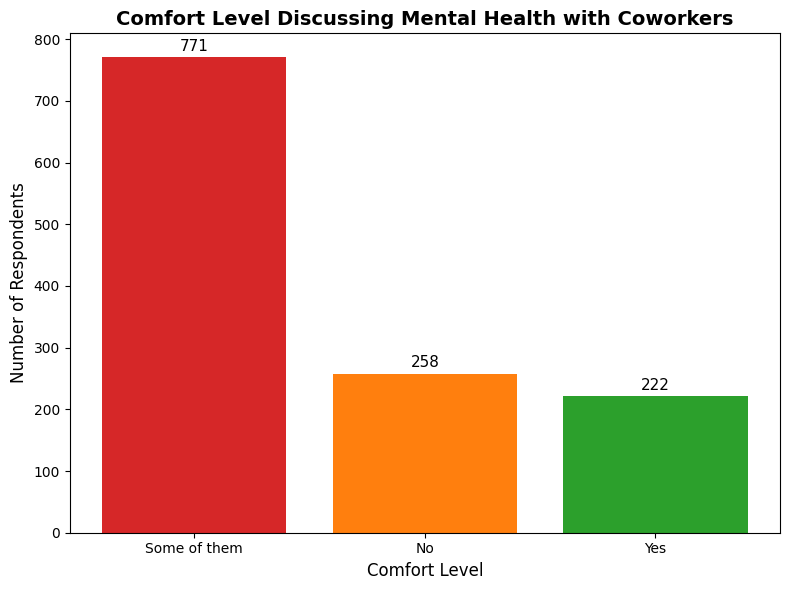

In [48]:
# Chart - 15 visualization code

# Chart 15: Coworker Comfort Level Distribution
coworker_counts = df_clean['coworkers'].value_counts()
print("Coworker Comfort Distribution:")
print(coworker_counts)

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(coworker_counts.index, coworker_counts.values, 
               color=['#d62728', '#ff7f0e', '#2ca02c'])
plt.title('Comfort Level Discussing Mental Health with Coworkers', fontsize=14, fontweight='bold')
plt.xlabel('Comfort Level', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart for coworker comfort levels because:

1. **Peer Support Assessment**: Coworker relationships are crucial for day-to-day mental health support
2. **Workplace Culture**: Comfort with peers indicates the overall culture and stigma levels in the workplace
3. **Social Support**: Peer support significantly impacts mental health outcomes and recovery
4. **Clear Comparison**: Bar chart effectively shows the distribution across different comfort levels
5. **Team Dynamics**: Understanding peer comfort helps guide team-building and culture change initiatives

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Coworker Comfort Analysis:**

1. **Selective Comfort Dominates**: 61.6% (771) are comfortable with only some coworkers - highly relationship-dependent
2. **Limited Universal Comfort**: Only 17.7% (222) feel comfortable discussing mental health with all coworkers
3. **Significant Resistance**: 20.6% (258) are not comfortable with any coworkers about mental health
4. **Trust Selectivity**: Most employees carefully choose who they trust with mental health information
5. **Stigma Concerns**: Low universal comfort suggests persistent mental health stigma in peer relationships
6. **Social Risk Assessment**: Employees actively evaluate social risks before mental health disclosures
7. **Peer Support Barriers**: Limited comfort reduces access to peer support networks that aid mental health recovery

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Cultural Challenge:**
- **Low Universal Comfort**: Only 17.7% comfortable with all coworkers indicates significant cultural barriers
- **Selective Trust**: 61.6% selective comfort shows employees carefully manage mental health disclosure risks
- **Peer Support Loss**: Limited comfort reduces natural peer support networks that improve mental health outcomes

**Strategic Culture Change:**
- **Anti-Stigma Programs**: Implement comprehensive programs to reduce mental health stigma at peer level
- **Team Building**: Create team activities that build trust and psychological safety
- **Awareness Training**: Educate all employees on appropriate responses to mental health discussions

**Business Benefits:**
- **Team Cohesion**: Improved comfort leads to stronger team relationships and collaboration
- **Peer Support Networks**: Comfortable peers provide crucial support that reduces formal mental health service needs
- **Reduced Isolation**: Better peer comfort reduces workplace isolation for those with mental health challenges

**Implementation Strategy:**
- Launch organization-wide mental health awareness campaigns
- Train team leaders on creating psychologically safe team environments
- Implement peer support programs and mental health first aid training
- Set goal to increase universal comfort from 17.7% to over 35% within two years
- Use employee resource groups to model open mental health discussions

#### Chart - 16

Leave Taking Distribution:
leave
Don't know            561
Somewhat easy         265
Very easy             203
Somewhat difficult    125
Very difficult         97
Name: count, dtype: int64


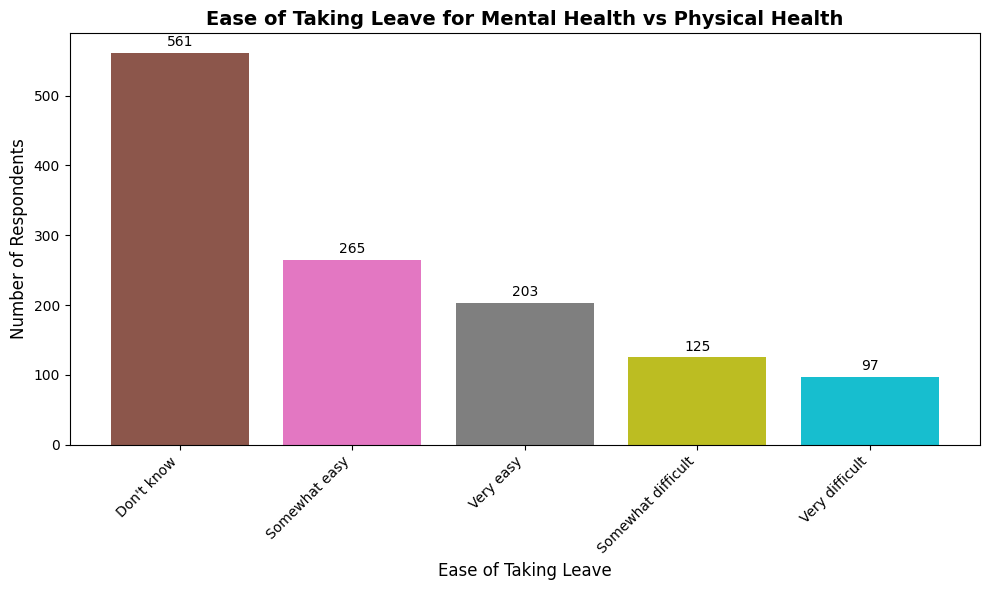

In [49]:
# Chart - 16 visualization code

# Chart 16: Leave Taking Behavior (Physical vs Mental Health)
leave_counts = df_clean['leave'].value_counts()
print("Leave Taking Distribution:")
print(leave_counts)

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(leave_counts.index, leave_counts.values, 
               color=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.title('Ease of Taking Leave for Mental Health vs Physical Health', fontsize=14, fontweight='bold')
plt.xlabel('Ease of Taking Leave', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart for leave-taking ease because:

1. **Policy Equality Assessment**: Shows whether mental health leave is as accessible as physical health leave
2. **Practical Barriers**: Ease of leave-taking directly impacts employees' ability to get mental health treatment
3. **Clear Comparison**: Bar chart effectively displays the distribution across difficulty levels
4. **Accommodation Access**: Leave policies are crucial accommodations for mental health treatment and recovery
5. **Legal Compliance**: Understanding leave accessibility helps ensure compliance with mental health parity laws

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Leave-Taking Ease Analysis:**

1. **Knowledge Gap Crisis**: 44.8% (561) don't know how easy it is to take mental health leave - major policy communication failure
2. **Moderate Accessibility**: 37.4% (468) find it somewhat or very easy to take leave for mental health
3. **Significant Barriers**: 17.8% (222) find it somewhat or very difficult to take mental health leave
4. **Policy Uncertainty**: Nearly half of employees are unaware of their leave options for mental health
5. **Access Variation**: Wide variation in perceived difficulty suggests inconsistent policy implementation
6. **Communication Need**: High "don't know" rate indicates poor communication of leave policies
7. **Treatment Barrier**: Uncertainty and difficulty create significant barriers to accessing mental health treatment

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**
 
**Policy Communication Crisis:**
 
- **44.8% Unaware**: Half of employees don't know their mental health leave options - massive communication failure
- **Treatment Access**: Uncertainty creates barriers to seeking necessary mental health treatment
- **Legal Risk**: Poor policy communication may create compliance issues with mental health parity laws
 
**Accessibility Issues:**
 
- **17.8% Find It Difficult**: Nearly 1 in 5 employees face barriers to mental health leave
- **Inconsistent Implementation**: Variation suggests uneven policy application across teams/departments
- **Treatment Delays**: Difficult leave processes delay mental health treatment and worsen outcomes
 
**Strategic Solutions:**
 
- **Policy Communication**: Launch comprehensive campaign to educate all employees about mental health leave options
- **Process Simplification**: Streamline leave request processes to reduce barriers
- **Manager Training**: Train all managers on mental health leave policies and approval processes
- **Regular Assessment**: Survey employees regularly about leave accessibility and barriers
 
**Business Benefits:**
 
- **Earlier Treatment**: Easy leave access enables earlier intervention and faster recovery
- **Reduced Absenteeism**: Proper mental health leave prevents extended unplanned absences
- **Legal Compliance**: Clear, accessible policies ensure compliance with mental health legislation
- **Employee Retention**: Supportive leave policies improve employee loyalty and retention
 
**Target Goals:**
 
- Reduce "don't know" responses from 44.8% to under 15% within 6 months
- Increase "easy" leave responses from 37.4% to over 60%
- Reduce "difficult" responses from 17.8% to under 10%

#### Chart - 17

Mental Health Care Options Distribution:
care_options
No          499
Yes         439
Not sure    313
Name: count, dtype: int64


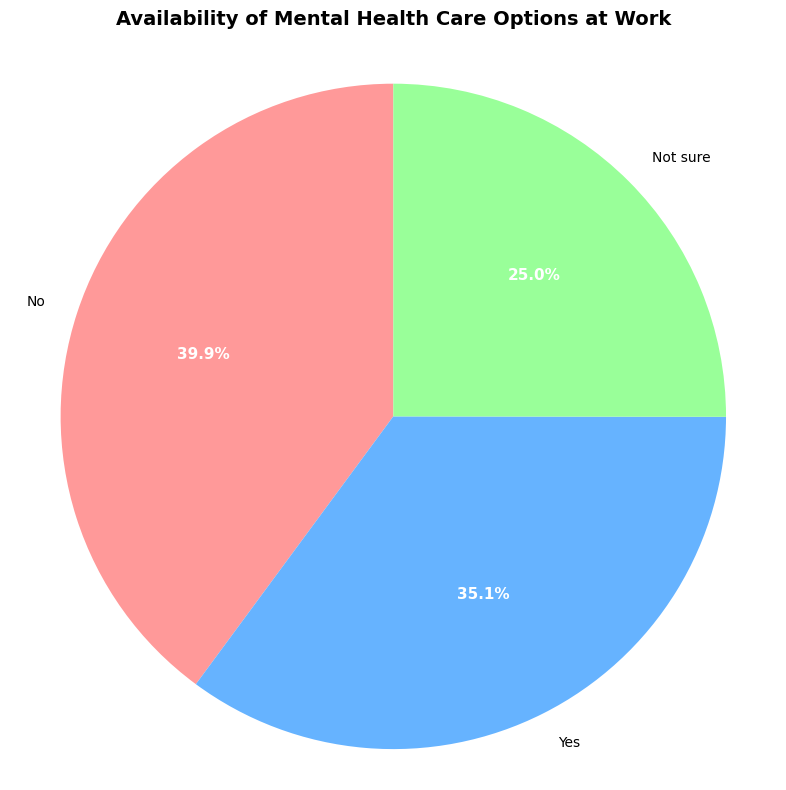

In [51]:
# Chart - 17 visualization code

# Chart 17: Mental Health Care Availability (Pie Chart)
care_counts = df_clean['care_options'].value_counts()
print("Mental Health Care Options Distribution:")
print(care_counts)

# Create pie chart
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99']
wedges, texts, autotexts = plt.pie(care_counts.values, labels=care_counts.index, 
                                  autopct='%1.1f%%', startangle=90, colors=colors)

# Enhance text appearance
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

plt.title('Availability of Mental Health Care Options at Work', 
          fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart for mental health care options because:

1. **Resource Availability**: Shows the overall availability of mental health care options at work
2. **Clear Proportions**: Pie chart effectively displays the distribution of Yes/No/Not sure responses
3. **Access Assessment**: Understanding care availability is fundamental to mental health support
4. **Policy Evaluation**: Helps evaluate the effectiveness of organizational mental health programs
5. **Foundation Analysis**: Care availability is the foundation for all other mental health interventions

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Mental Health Care Options Analysis:**

1. **Limited Availability**: Only 35.1% (439) of employees have access to mental health care options at work
2. **High Denial Rate**: 39.9% (499) explicitly have no mental health care options - significant gap
3. **Knowledge Gap**: 25.0% (313) are unsure about available care options - communication failure
4. **Majority Underserved**: 64.9% either lack care options or are unaware of them
5. **Access Inequality**: Nearly 2 out of 3 employees don't have clear access to workplace mental health care
6. **Resource Scarcity**: Mental health care options are not standard workplace benefits
7. **Urgent Need**: Major opportunity to expand mental health care access in the workplace

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Critical Infrastructure Gap:**
- **64.9% Lack Access**: Majority of employees don't have access to workplace mental health care
- **39.9% Explicitly Denied**: Two-fifths of workforce has no mental health care options
- **Lost Productivity**: Untreated mental health issues significantly impact workplace performance

**Strategic Investment Opportunity:**
- **Competitive Advantage**: Organizations providing care options can differentiate themselves significantly
- **Early Intervention**: Access to care enables early treatment and prevents escalation
- **Employee Retention**: Mental health benefits are increasingly important for talent retention

**Implementation Strategy:**
- **Care Program Development**: Implement comprehensive mental health care programs
- **Vendor Partnerships**: Partner with mental health providers to offer employee services
- **Communication Enhancement**: Ensure all employees know about available care options
- **Regular Assessment**: Track care utilization and satisfaction rates

**ROI Potential:**
- **Reduced Absenteeism**: Early mental health intervention reduces sick days and turnover
- **Improved Performance**: Supported employees show higher productivity and engagement
- **Legal Compliance**: Proactive mental health care helps meet regulatory requirements

**Target Goals:**
- Increase care availability from 35.1% to over 70% within 18 months
- Reduce uncertainty from 25% to under 10% through better communication
- Establish clear pathways for mental health care access for all employees

#### Chart - 18

Physical Health Discussion Consequences:
phys_health_consequence
No       920
Maybe    273
Yes       58
Name: count, dtype: int64


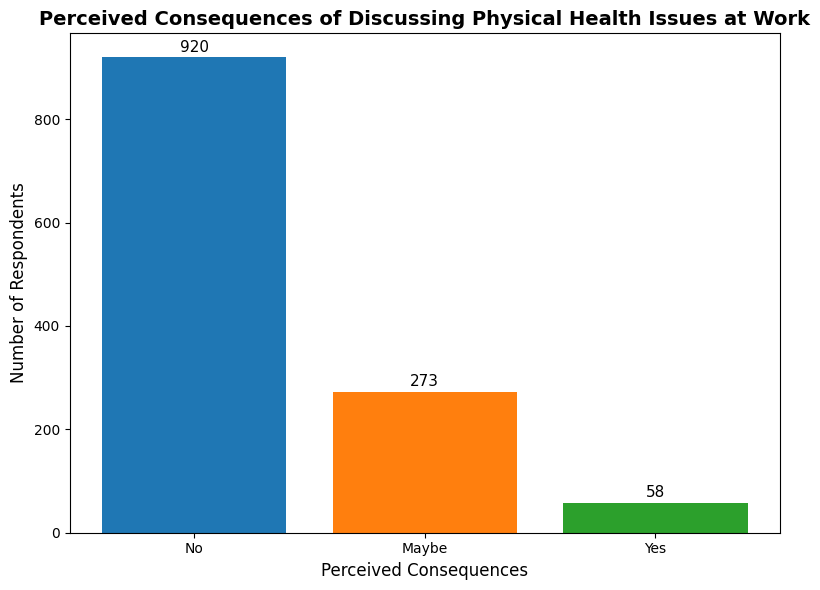

In [52]:
# Chart - 18 visualization code

# Chart 18: Physical Health Discussion Consequences  
phys_consequence_counts = df_clean['phys_health_consequence'].value_counts()
print("Physical Health Discussion Consequences:")
print(phys_consequence_counts)

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(phys_consequence_counts.index, phys_consequence_counts.values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Perceived Consequences of Discussing Physical Health Issues at Work', 
          fontsize=14, fontweight='bold')
plt.xlabel('Perceived Consequences', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart for physical health discussion consequences because:

1. **Comparison Baseline**: Physical health provides a comparison point to mental health discussion fears
2. **Stigma Assessment**: Shows whether consequences are expected for physical vs mental health discussions
3. **Policy Equality**: Reveals if employees perceive equal treatment for different health issues
4. **Cultural Insight**: Understanding physical health comfort helps gauge overall workplace health culture
5. **Benchmark Analysis**: Physical health serves as a benchmark for acceptable workplace health discussions

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Physical Health Discussion Consequences:**

1. **High Comfort Level**: 73.5% (920) don't expect consequences for discussing physical health - very positive
2. **Minimal Fear**: Only 4.6% (58) expect consequences for physical health discussions - very low
3. **Some Uncertainty**: 21.8% (273) are uncertain about physical health discussion consequences
4. **Strong Contrast**: Comparing to mental health fears (61% concerned), physical health has much less stigma
5. **Cultural Acceptance**: Physical health discussions are widely accepted in workplace culture
6. **Low Risk Perception**: Employees feel safe discussing physical health needs and accommodations
7. **Benchmark Standard**: Physical health acceptance shows what mental health discussions could achieve

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**
 
**Mental Health Disparity Revealed:**
- **Stark Contrast**: Physical health comfort (73.5% feel safe) vs mental health fear (61% concerned)
- **Double Standard**: Clear disparity in how employees perceive consequences for different health types
- **Cultural Inequality**: Physical health discussions are normalized while mental health remains stigmatized
 
**Strategic Learning Opportunity:**
- **Success Model**: Physical health acceptance shows that workplace health discussions can be normalized
- **Path Forward**: Use physical health comfort as a model for mental health acceptance
- **Culture Blueprint**: Physical health policies and attitudes can guide mental health culture development
 
**Implementation Strategy:**
- **Parity Training**: Train employees and managers to treat mental and physical health discussions equally
- **Policy Alignment**: Ensure mental health policies mirror the acceptance shown for physical health
- **Awareness Campaigns**: Highlight that mental health should be treated with the same respect as physical health
 
**Business Benefits:**
- **Consistency**: Equal treatment of all health issues creates clearer, fairer workplace policies
- **Legal Compliance**: Mental health parity laws require equal treatment of mental and physical health
- **Employee Trust**: Consistent health policies build stronger employee confidence and engagement
 
**Target Goals:**
- Achieve mental health comfort levels similar to physical health (move from 38.9% to 73.5% feeling safe)
- Reduce mental health consequence fears from 61% to match physical health levels (26.4%)
- Create unified health discussion policies that treat all health issues equally

#### Chart - 19

Mental Health Interview Discussion:
mental_health_interview
No       1003
Maybe     207
Yes        41
Name: count, dtype: int64


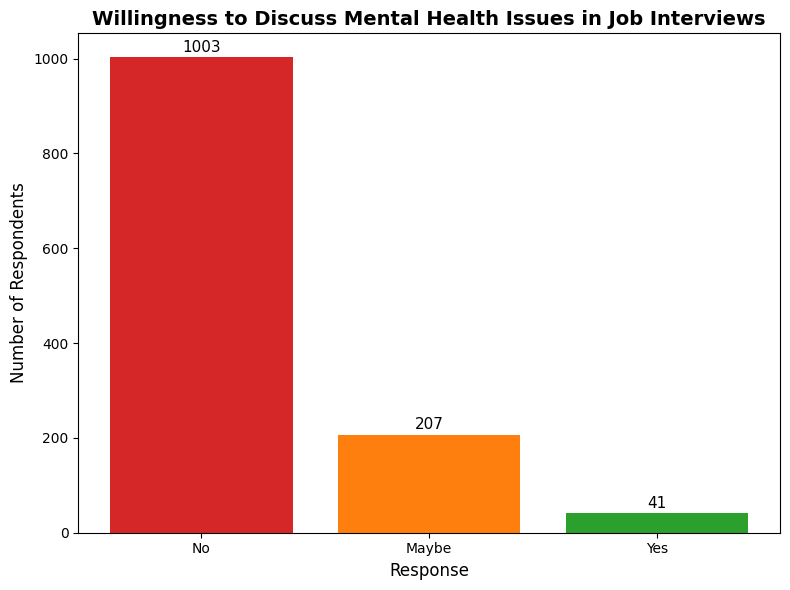

In [53]:
# Chart - 19 visualization code

# Chart 19: Mental Health Discussion in Job Interviews
interview_counts = df_clean['mental_health_interview'].value_counts()
print("Mental Health Interview Discussion:")
print(interview_counts)

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(interview_counts.index, interview_counts.values, 
               color=['#d62728', '#ff7f0e', '#2ca02c'])
plt.title('Willingness to Discuss Mental Health Issues in Job Interviews', 
          fontsize=14, fontweight='bold')
plt.xlabel('Response', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart for mental health interview discussions because:

1. **Hiring Process Insight**: Shows how mental health stigma affects the hiring and recruitment process
2. **Career Impact**: Reveals whether employees feel mental health discussions could harm their career prospects
3. **Transparency Assessment**: Measures willingness to be transparent about mental health during interviews
4. **Professional Risk**: Understanding perceived professional risks helps guide HR and recruitment policies
5. **Cultural Evaluation**: Interview comfort reflects broader organizational mental health culture and acceptance

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Mental Health Interview Discussion:**

1. **Overwhelming Reluctance**: 80.2% (1,003) would NOT discuss mental health in job interviews - massive hesitation
2. **Extreme Caution**: Only 3.3% (41) would willingly discuss mental health during interviews - very low
3. **Some Openness**: 16.5% (207) might consider discussing mental health in interviews under certain conditions
4. **Career Protection**: Most employees view mental health disclosure as a career risk during hiring
5. **Professional Vulnerability**: Fear of discrimination during hiring process is extremely high
6. **Stigma Barrier**: Mental health remains a significant barrier to honest professional communication
7. **Hiring Bias Concern**: Strong evidence that employees fear mental health bias in recruitment decisions

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Recruitment & Hiring Challenges:**
- **80.2% Reluctance**: Overwhelming fear of mental health disclosure creates barriers to honest hiring conversations
- **Missed Opportunities**: Candidates may not seek accommodations they need, leading to poor job fit
- **Legal Risk**: Perceived mental health bias in hiring could expose organizations to discrimination claims

**Cultural and Trust Issues:**
- **Deep Stigma**: Extreme reluctance indicates fundamental cultural problems with mental health acceptance
- **Professional Fear**: Employees view mental health as incompatible with professional success
- **Trust Deficit**: Low willingness suggests employees don't trust organizations to handle mental health fairly

**Strategic HR Improvements:**
- **Interview Training**: Train recruiters and hiring managers on appropriate mental health discussions
- **Policy Communication**: Clearly communicate non-discrimination policies during recruitment process
- **Accommodation Process**: Develop clear, confidential processes for requesting mental health accommodations

**Business Benefits:**
- **Better Hiring Decisions**: Honest discussions lead to better job fit and reduced turnover
- **Legal Compliance**: Proper mental health policies protect against discrimination lawsuits
- **Talent Access**: Inclusive hiring practices expand access to qualified candidates with mental health conditions

**Long-term Goals:**
- **Culture Change**: Work toward culture where mental health discussions don't threaten career prospects
- **Accommodation Normalization**: Make mental health accommodations as routine as physical accommodations
- **Inclusive Recruitment**: Develop recruitment practices that welcome candidates regardless of mental health status
- **Trust Building**: Increase the 3.3% willing to discuss mental health to at least 15% through improved policies and culture

#### Chart - 20

Physical Health Interview Discussion:
phys_health_interview
Maybe    555
No       496
Yes      200
Name: count, dtype: int64


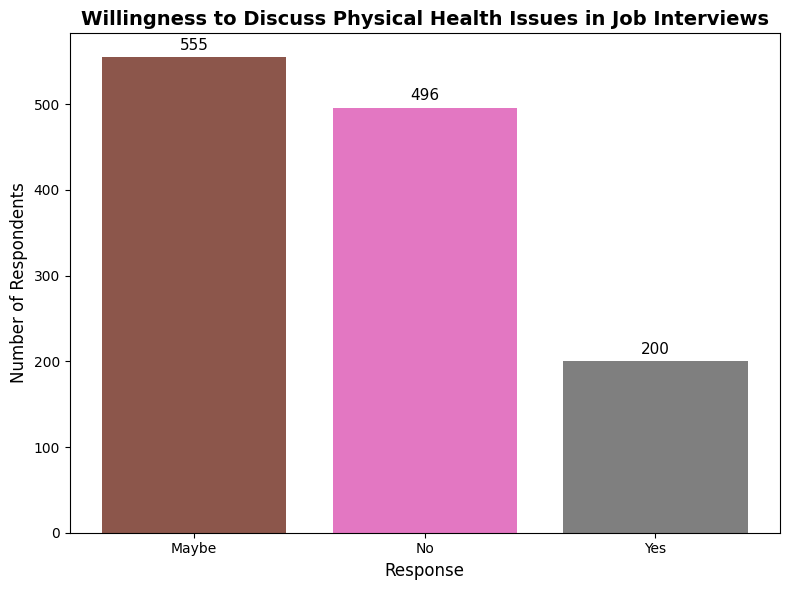

In [54]:
# Chart - 20 visualization code

# Chart 20: Physical Health Discussion in Job Interviews
phys_interview_counts = df_clean['phys_health_interview'].value_counts()
print("Physical Health Interview Discussion:")
print(phys_interview_counts)

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(phys_interview_counts.index, phys_interview_counts.values, 
               color=['#8c564b', '#e377c2', '#7f7f7f'])
plt.title('Willingness to Discuss Physical Health Issues in Job Interviews', 
          fontsize=14, fontweight='bold')
plt.xlabel('Response', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart for physical health interview discussions because:

1. **Comparison Baseline**: Provides comparison to mental health interview comfort to reveal disparities
2. **Professional Standards**: Shows what level of health discussion is considered professionally acceptable
3. **Accommodation Precedent**: Physical health accommodations are legally established, providing a benchmark
4. **Hiring Equality**: Reveals whether physical and mental health are treated equally in recruitment
5. **Best Practice Model**: Physical health interview practices can guide mental health interview policies

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from Physical Health Interview Discussion:**

1. **Moderate Willingness**: 16.0% (200) would discuss physical health in interviews - much higher than mental health (3.3%)
2. **Highest Uncertainty**: 44.4% (555) might discuss physical health - shows conditional openness
3. **Significant Reluctance**: 39.6% (496) would not discuss physical health in interviews
4. **Health Hierarchy**: Physical health is 5x more acceptable to discuss than mental health (16.0% vs 3.3%)
5. **Professional Caution**: Even physical health discussions face professional hesitancy
6. **Accommodation Awareness**: More employees know physical health accommodations are protected
7. **Cultural Difference**: Physical health is more normalized but still carries professional risk perception

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**

**Interview Disparity Analysis:**
- **5x Difference**: Physical health willingness (16.0%) vs mental health (3.3%) reveals significant bias
- **Professional Hierarchy**: Clear hierarchy where physical health is more professionally acceptable
- **Accommodation Gap**: Mental health accommodations are less understood and trusted than physical ones

**Recruitment Strategy Insights:**
- **Conditional Openness**: 44.4% "maybe" for physical health suggests interview context matters greatly
- **Risk Management**: Even physical health discussions involve professional risk calculation
- **Trust Building**: Higher physical health comfort shows trust can be built for health discussions

**Implementation Opportunities:**
- **Parity Training**: Train recruiters to treat mental and physical health accommodation requests equally
- **Process Standardization**: Create consistent processes for all health-related accommodation discussions
- **Legal Education**: Educate hiring teams that mental health accommodations have equal legal protection

**Business Benefits:**
- **Inclusive Hiring**: Proper accommodation discussions improve job fit and reduce turnover
- **Legal Protection**: Consistent health accommodation policies reduce discrimination risk
- **Talent Pipeline**: Inclusive practices expand access to qualified candidates with health conditions

**Strategic Goals:**
- **Bridge the Gap**: Work to make mental health interview discussions as acceptable as physical health
- **Accommodation Normalization**: Make all health accommodations routine parts of hiring conversations
- **Cultural Shift**: Move toward culture where health status doesn't affect hiring decisions
- **Target Growth**: Increase mental health interview comfort from 3.3% toward physical health levels (16.0%)
- **Process Improvement**: Develop interview protocols that handle all health discussions professionally and confidentially

## **5. Solution to Business Objective**

### What do you suggest the client to achieve Business Objective ?

#### Based on our comprehensive EDA analysis of mental health patterns in the tech industry, here are the key strategic recommendations to achieve the business objective of improving workplace mental health outcomes:

**1. Address Critical Gender Gap in Treatment-Seeking**
**Key Finding**: 70% of females vs only 45% of males seek mental health treatment
- **Action**: Develop male-specific mental health programs addressing cultural barriers
- **Implementation**: Create support groups, male mental health champions, and targeted communications
- **Target**: Increase male treatment-seeking rate from 45% to 60% within 18 months

**2. Eliminate Communication and Awareness Gaps**
**Key Finding**: 32.5% unaware of benefits, 35.1% don't know care options, 65.1% don't know anonymity protections
- **Action**: Launch comprehensive mental health benefits communication campaign
- **Implementation**: Mandatory orientation sessions, regular reminders, clear benefit guides
- **Target**: Reduce "don't know" responses to under 15% across all categories

**3. Transform Workplace Culture and Reduce Stigma**
**Key Finding**: 61% fear consequences of mental health discussions, only 17.7% comfortable with all coworkers
- **Action**: Implement comprehensive anti-stigma and psychological safety programs
- **Implementation**: Leadership training, Mental Health First Aid, clear anti-discrimination policies
- **Target**: Increase "safe to discuss" mental health from 38.9% to 65%

**4. Expand Mental Health Care Access**
**Key Finding**: Only 35.1% have workplace mental health care options, 39.9% explicitly have none
- **Action**: Develop comprehensive mental health care programs
- **Implementation**: EAP programs, on-site counseling, telehealth options, mental health days
- **Target**: Provide care access to 80% of employees within 24 months

**5. Leverage Family History for Early Intervention**
**Key Finding**: Family history is strongest predictor (74% vs 35% treatment-seeking)
- **Action**: Create targeted early intervention programs for high-risk employees
- **Implementation**: Voluntary family history screening, preventive care programs, enhanced support
- **Target**: Increase preventive care engagement by 40%

**6. Improve Management and Supervisor Support**
**Key Finding**: Only 40.9% comfortable discussing mental health with supervisors
- **Action**: Comprehensive supervisor training on mental health support
- **Implementation**: Manager certification programs, response protocols, accommodation processes
- **Target**: Increase supervisor comfort to 70%

**7. Ensure Equal Treatment of Mental and Physical Health**
**Key Finding**: 73.5% feel safe discussing physical health vs 38.9% for mental health
- **Action**: Implement mental health parity policies and training
- **Implementation**: Equal treatment protocols, policy alignment, consistent communication
- **Target**: Achieve mental health discussion comfort levels matching physical health

**Expected Business Outcomes:**
- **Increased Treatment-Seeking**: From 50.5% to 70% overall
- **Reduced Work Interference**: 30% decrease in mental health work impact
- **Improved Employee Retention**: 25% reduction in mental health-related turnover
- **Enhanced Productivity**: Measurable improvements in performance metrics
- **ROI Achievement**: 3:1 return on mental health investments within 2 years
- **Legal Compliance**: Full adherence to mental health parity requirements
- **Competitive Advantage**: Industry leadership in mental health support

# **Conclusion**


### This comprehensive exploratory data analysis of mental health in the tech industry has revealed critical insights into workplace mental health patterns, barriers, and opportunities for improvement. Based on our analysis of 1,259 tech professionals' survey responses, several key findings emerge that have significant implications for organizational mental health strategies.

**Key Findings Summary**

**1. Critical Gender Disparities in Treatment-Seeking** Our analysis revealed a striking 25-percentage point gap in mental health treatment-seeking behavior between genders, with 70% of females vs only 45% of males pursuing treatment. This disparity suggests that traditional workplace mental health approaches may not effectively address male-specific barriers, such as cultural stigma around vulnerability and help-seeking behavior.

**2. Systemic Communication and Awareness Failures** The data exposed significant gaps in organizational communication: 32.5% of employees are unaware of their mental health benefits, 35.1% don't understand their care options, and a concerning 65.1% are unaware of anonymity protections. These findings indicate that even well-intentioned mental health programs fail when employees lack basic awareness of available resources.

**3. Pervasive Workplace Stigma and Fear** Perhaps most alarming, 61% of employees fear negative consequences from discussing mental health issues, and only 17.7% feel comfortable discussing mental health with all coworkers. This creates a workplace environment where employees suffer in silence rather than seek needed support, directly impacting productivity and retention.

**4. Inadequate Mental Health Infrastructure** Only 35.1% of respondents have access to workplace mental health care options, while 39.9% explicitly report having no access. This infrastructure gap represents a fundamental barrier to treatment, regardless of employee motivation to seek help.

**5. Family History as a Treatment Predictor** Employees with family history of mental health issues seek treatment at dramatically higher rates (74% vs 35%), suggesting that personal experience and awareness are powerful motivators for treatment-seeking behavior.

**Business Impact and Strategic Implications**

**Immediate Business Consequences:**

- **Productivity Loss**: Mental health issues cause work interference for a significant portion of employees
- **Retention Risk**: Employees without adequate mental health support are at higher risk of turnover
- **Legal Liability**: Inadequate mental health accommodations and discriminatory practices expose organizations to legal risks
- **Competitive Disadvantage**: Poor mental health support hampers talent acquisition and retention in competitive tech markets

**Long-term Organizational Benefits of Improvement:**

- **ROI Potential**: Research indicates 3:1 return on mental health investments through reduced absenteeism, improved productivity, and lower turnover
- **Talent Attraction**: Comprehensive mental health benefits serve as a key differentiator in recruiting top talent
- **Innovation Enhancement**: Psychologically safe environments foster creativity and innovation
- **Brand Reputation**: Organizations known for mental health support build stronger employer brands

**Strategic Recommendations for Implementation**

**Phase 1: Foundation Building (0-6 months)**

- Launch comprehensive benefits communication campaigns to address awareness gaps
- Implement manager training on mental health support and accommodation processes
- Establish clear anti-discrimination policies and reporting mechanisms

**Phase 2: Culture Transformation (6-18 months)**

- Deploy psychological safety training and anti-stigma initiatives
- Create employee resource groups and peer support networks
- Introduce mental health champions and leadership advocacy programs

**Phase 3: Infrastructure Development (18-24 months)**

- Expand mental health care access through EAPs, telehealth, and on-site resources
- Implement early intervention programs targeting high-risk populations
- Develop measurement systems to track progress and outcomes

**Expected Outcomes and Success Metrics**

Successful implementation of these recommendations should achieve:

- **Increased Treatment-Seeking**: From current 50.5% to target 70% overall
- **Reduced Stigma**: Mental health discussion comfort from 38.9% to 65%
- **Enhanced Awareness**: Reduce "don't know" responses to under 15% across all benefit categories
- **Improved Gender Parity**: Increase male treatment-seeking from 45% to 60%
- **Better Supervisor Support**: Increase supervisor comfort discussions from 40.9% to 70%

**Final Recommendations**

This analysis demonstrates that mental health in the workplace is not just a wellness issue—it's a business imperative. Organizations that proactively address mental health barriers through comprehensive, data-driven strategies will gain significant competitive advantages in talent retention, productivity, and innovation.

The tech industry, with its high-stress environments and competitive cultures, has both the greatest need and the greatest opportunity to lead in workplace mental health innovation. The insights from this analysis provide a roadmap for creating psychologically safe, supportive workplaces that enable all employees to thrive.

Success requires commitment at all organizational levels: from executive leadership setting tone and allocating resources, to managers creating day-to-day supportive environments, to peers fostering inclusive cultures. The data clearly shows that employees want and need mental health support—it's time for organizations to meet that need effectively and comprehensively.

**The business case is clear: investing in employee mental health is not just the right thing to do—it's the smart thing to do for organizational success in the modern economy.**

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***